In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
Outcome_0 = df.loc[df['Outcome'] == 0.0]
Outcome_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [3]:
Outcome_1 = df.loc[df['Outcome'] == 1.0]
Outcome_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [4]:
feature_names = ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

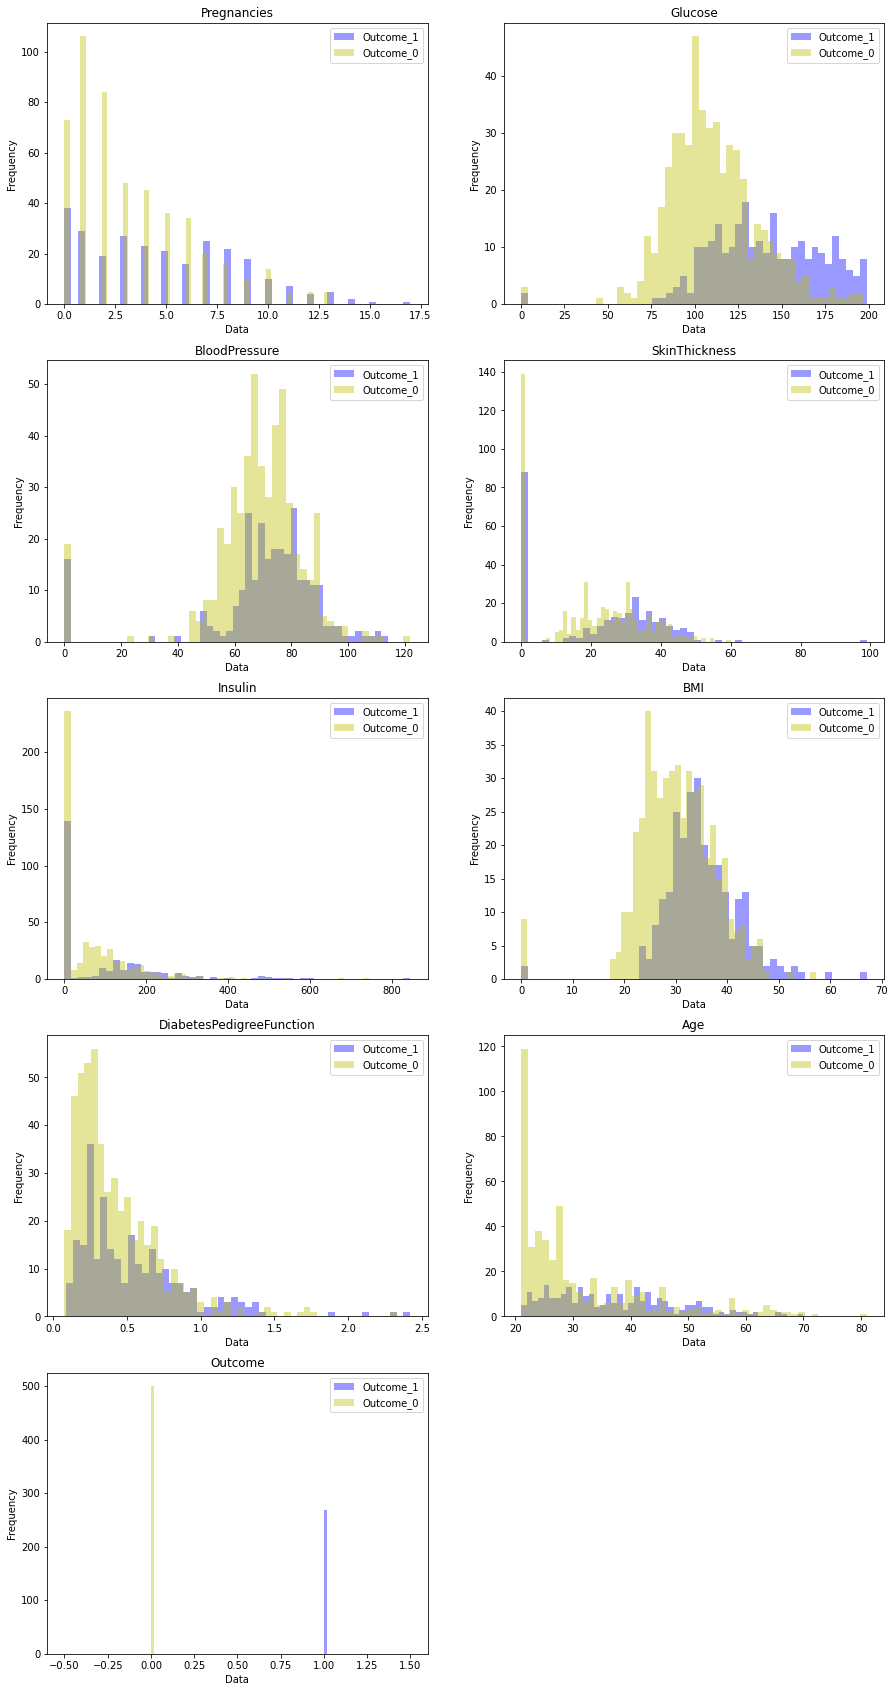

In [5]:
%matplotlib inline
plt.figure(figsize=(15,30))
counter = 0
for feature_name in feature_names[:]:
    plt.subplot(5, 2, counter+1)
    sns.distplot(Outcome_1[feature_name],bins=50,color='b',label='Outcome_1', kde=False);
    sns.distplot(Outcome_0[feature_name],bins=50,color='y',label='Outcome_0', kde=False);
    title = feature_name 
    plt.title(title)
    plt.xlabel('Data')
    plt.ylabel('Frequency')
    plt.legend()
    counter+=1
plt.show()

In [6]:
combinations = [['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
layer_num = 1

def Input_Creator(combinations):
    input_list = []
    counter = 0
    for i in combinations:
        for n in range(len(df)):
            if df.values[counter][len(df.values[0])-1] ==1:
                element = np.append([float(i) for i in df[i].values[counter]], [1])
                input_list.append(element)
            else:
                element = np.append([float(i) for i in df[i].values[counter]], [0])
                input_list.append(element)
            counter+=1
    return input_list

def W_initializor (input_list, layer_num):
    w = []
    for n in range(layer_num):
        layer = []
        for i in range(len(input_list[0])-1):
            layer.append(0.1)
        w.append(layer)
    return(w)
input_list = Input_Creator(combinations)
w = W_initializor(input_list,layer_num)
# input_list = Input_Creator(combinations)
w = np.array(w)
w

array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]])

### Single Layer Perceptron

In [7]:
import random
def train_test_split(input_list):
    random.seed(9001)
    random.shuffle(input_list)
    train_length = int(0.8*len(input_list))
    test_length = len(input_list) - train_length
    train = [input_list[:train_length]]
    test = [input_list[train_length:]]
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    for i in train[0]:
        train_x.append(i[:len(i)-1])
        train_y.append(i[len(i)-1])
    for i in test[0]:
        test_x.append(i[:len(i)-1])
        test_y.append(i[len(i)-1])
    return train_x, test_x, train_y, test_y,train,test
train_x, test_x, train_y, test_y,train,test = train_test_split(input_list)

In [8]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)
train = np.asarray(train)
test = np.asarray(test)

In [9]:
import math

update_sign = ''
l = 0.5
epochs = 1000
bias=[]
for i in range(layer_num):
    bias.append(0.1)
error = 1
error_holder = []
w_best = [w, bias, error]
w_holder = []
def evaluation(w, input_list):
    errors_counter = 0
    total = len(input_list)
    for i in input_list:
        if i[len(i)-1]==0:
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod > 0:
                errors_counter+=1
        else:   
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod <= 0:
                errors_counter+=1
#     print(errors_counter,total)
    error = float(errors_counter/total)
    return error
for n in range(epochs):
    
    for i in train[0]:
        if i[len(i)-1]==0:
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod > 0:
                w[0] = w[0] - np.dot(l,i)
                bias[0] -= l
        else:   
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod <= 0:
                w[0] = w[0] + np.dot(l,i)
                bias[0] += l
    error = evaluation(w, train[0])
    w_0 = w[0].copy()
    w_holder.append(w_0)
    error_holder.append(error)
    if error < w_best[2]:
        a = w.copy()
        b = bias.copy()
        c = error
        w_best = [a,b,c]
w_best
print('w',w)
print('b',b)
print('error',error)
print('w_best',w_best)

w [[ 846.6     95.6   -194.9    -64.9    -79.4    144.55  1313.246  -64.9  ]]
b [-8347.9]
error 0.34201954397394135
w_best [array([[ 848.6 ,  116.1 , -172.4 ,  -17.9 ,  -17.4 ,  172.85, 1138.76,
         -41.4 ]]), [-8347.9], 0.30130293159609123]


In [10]:
error = evaluation(w, test[0])
error

0.2857142857142857

In [11]:
w_plot = []
for i in range(len(w_holder[0])):
    w_plot.append([])
for i in w_holder:
    for n in range(len(w_holder[0])):
        w_plot[n].append(i[n])
# w_plot

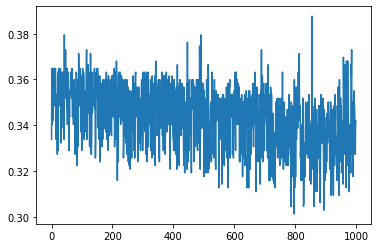

In [12]:
plt.plot(error_holder)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


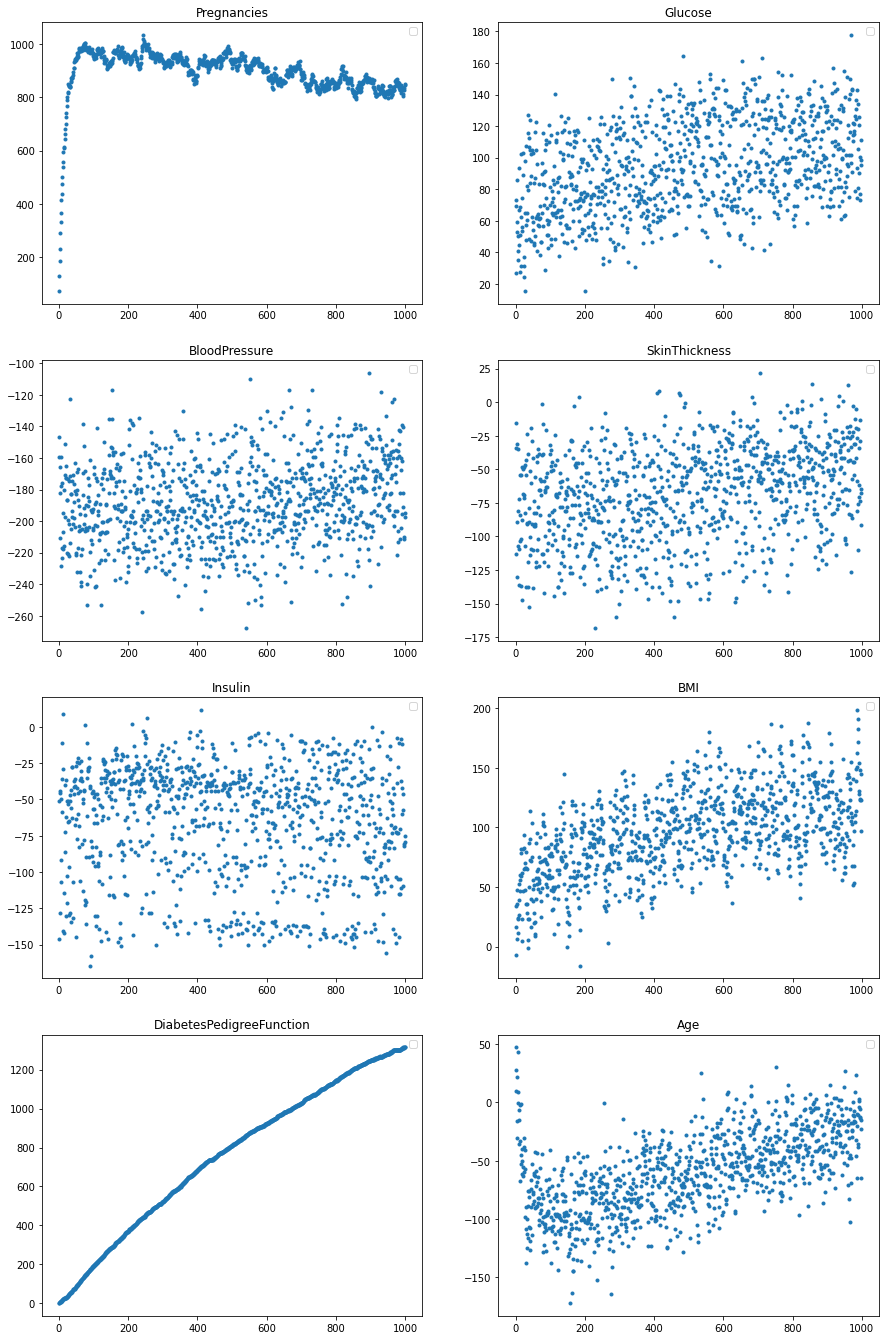

In [13]:
%matplotlib inline
plt.figure(figsize=(15,30))
counter = 0
titles = ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for i in w_plot:
    plt.subplot(5, 2, counter+1)
    plt.plot(i, '.')
    plt.title(titles[counter])
    plt.legend()
    counter+=1
plt.show()

# Perceptron Training on Two Features

In [14]:
combinations = [['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
layer_num = 1
# combinations = [combinations[:4], combinations[4:]]
# combinations = [combinations[0][:4]]
combinations = [['Glucose','Age']]
input_list = Input_Creator(combinations)
w = W_initializor(input_list,layer_num)
# input_list = Input_Creator(combinations)
w = np.array(w)
w

array([[0.1, 0.1]])

In [15]:
train_x, test_x, train_y, test_y,train,test = train_test_split(input_list)
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)
train = np.asarray(train)
test = np.asarray(test)

In [16]:
update_sign = ''
l = 0.5
epochs = 1000
bias=[]
for i in range(layer_num):
    bias.append(0.1)
error = 1
error_holder = []
w_best = [w, bias, error]
w_holder = []
def evaluation(w, input_list):
    errors_counter = 0
    total = len(input_list)
    for i in input_list:
        if i[len(i)-1]==0:
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod > 0:
                errors_counter+=1
        else:   
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod <= 0:
                errors_counter+=1
#     print(errors_counter,total)
    error = float(errors_counter/total)
    return error
for n in range(epochs):
    
    for i in train[0]:
        if i[len(i)-1]==0:
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod > 0:
                w[0] = w[0] - np.dot(l,i)
                bias[0] -= l
        else:   
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod <= 0:
                w[0] = w[0] + np.dot(l,i)
                bias[0] += l
    error = evaluation(w, train[0])
    w_0 = w[0].copy()
    w_holder.append(w_0)
    error_holder.append(error)
    if error < w_best[2]:
        a = w.copy()
        b = bias.copy()
        c = error
        w_best = [a,b,c]
print('w',w)
print('b',b)
print('error',error)
print('w_best',w_best)

w [[45.1 41.6]]
b [-7726.9]
error 0.28501628664495116
w_best [array([[50.1, -1.4]]), [-7726.9], 0.254071661237785]


In [17]:
error = evaluation(w, test[0])
error

0.24675324675324675

In [18]:
w_plot = []
for i in range(len(w_holder[0])):
    w_plot.append([])
for i in w_holder:
    for n in range(len(w_holder[0])):
        w_plot[n].append(i[n])

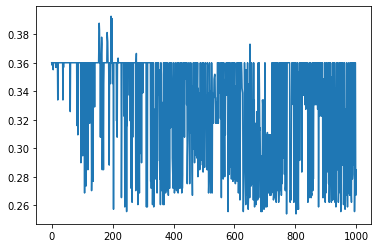

In [19]:
plt.plot(error_holder)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


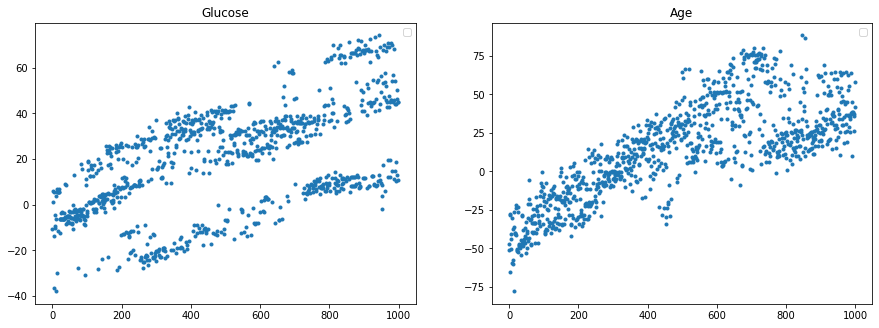

In [20]:
%matplotlib inline
plt.figure(figsize=(15,30))
counter = 0
titles = ['Glucose','Age']

for i in w_plot:
    plt.subplot(5, 2, counter+1)
    plt.plot(i, '.')
    plt.title(titles[counter])
    plt.legend()
    counter+=1
plt.show()

# A Better way of training on perceptron

In [21]:
combinations = [['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
layer_num = 1
# combinations = [combinations[:4], combinations[4:]]
# combinations = [combinations[0][:4]]
# combinations = [['Glucose','Age']]
input_list = Input_Creator(combinations)
w = W_initializor(input_list,layer_num)
# input_list = Input_Creator(combinations)
w = np.array(w)
train_x, test_x, train_y, test_y,train,test = train_test_split(input_list)
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)
train = np.asarray(train)
test = np.asarray(test)


update_sign = ''
l = 0.5
epochs = 1250
bias=[]
for i in range(layer_num):
    bias.append(0.1)
error = 1
error_holder = []
w_best = [w, bias, error]
w_holder = []

feature_selector = [0,250,500,750,1000]
features_holder = [['Pregnancies', 'Glucose'],['BloodPressure','SkinThickness'],['Insulin','BMI'],['DiabetesPedigreeFunction','Age']]
features_index = [[0, 1],[2,3],[4,5],[6,7]]
features = ''
zeros_holder = train_x[0][:].copy()
zeros_holder[:] = 0
for n in range(epochs):
    if n == feature_selector[1]:
        features = features_index[0]
    elif n == feature_selector[2]:
        features = features_index[1]
    elif n == feature_selector[3]:
        features = features_index[2]
    elif n == feature_selector[4]:
        features = features_index[3]
    for i in train[0]:
        if i[len(i)-1]==0:
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod > 0:
                if n>249:
                    i_temp = i.copy()
                    i = zeros_holder.copy()
                    i[features[0]] = i_temp[features[0]]
                    i[features[1]] = i_temp[features[1]]
                w[0] = w[0] - np.dot(l,i)
                bias[0] -= l
        else:   
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod <= 0:
                if n>249:
                    i_temp = i.copy()
                    i = zeros_holder.copy()
                    i[features[0]] = i_temp[features[0]]
                    i[features[1]] = i_temp[features[1]]
                w[0] = w[0] + np.dot(l,i)
                bias[0] += l
    error = evaluation(w, train[0])
    w_0 = w[0].copy()
    w_holder.append(w_0)
    error_holder.append(error)
    print(error)
    if error < w_best[2]:
        a = w.copy()
        b = bias.copy()
        c = error
        w_best = [a,b,c]
print('w',w)
print('b',b)
print('error',error)
print('w_best',w_best)

0.3338762214983713
0.36482084690553745
0.34039087947882735
0.36482084690553745
0.34201954397394135
0.34364820846905536
0.36482084690553745
0.3566775244299674
0.36482084690553745
0.36482084690553745
0.3485342019543974
0.3550488599348534
0.36319218241042345
0.36482084690553745
0.33876221498371334
0.3338762214983713
0.3534201954397394
0.3501628664495114
0.33713355048859933
0.3273615635179153
0.36156351791530944
0.36319218241042345
0.3289902280130293
0.36319218241042345
0.36482084690553745
0.36319218241042345
0.36319218241042345
0.3501628664495114
0.3485342019543974
0.36482084690553745
0.35993485342019543
0.3322475570032573
0.36156351791530944
0.33876221498371334
0.36319218241042345
0.3534201954397394
0.3517915309446254
0.35993485342019543
0.36319218241042345
0.34527687296416937
0.3355048859934853
0.3338762214983713
0.3794788273615635
0.3566775244299674
0.3550488599348534
0.36482084690553745
0.3729641693811075
0.3583061889250814
0.3517915309446254
0.36482084690553745
0.3469055374592834
0.3

0.2899022801302932
0.30293159609120524
0.30293159609120524
0.30456026058631924
0.30293159609120524
0.2899022801302932
0.30618892508143325
0.2915309446254072
0.30618892508143325
0.30130293159609123
0.30293159609120524
0.30456026058631924
0.30618892508143325
0.31107491856677527
0.28338762214983715
0.30293159609120524
0.30618892508143325
0.28501628664495116
0.30293159609120524
0.30618892508143325
0.28664495114006516
0.30293159609120524
0.30293159609120524
0.30781758957654726
0.28664495114006516
0.30293159609120524
0.30456026058631924
0.30618892508143325
0.28501628664495116
0.30293159609120524
0.30130293159609123
0.30618892508143325
0.28664495114006516
0.30293159609120524
0.28664495114006516
0.2996742671009772
0.2899022801302932
0.30293159609120524
0.30293159609120524
0.30456026058631924
0.28664495114006516
0.2996742671009772
0.2964169381107492
0.30293159609120524
0.28664495114006516
0.30293159609120524
0.2931596091205212
0.2996742671009772
0.28664495114006516
0.2996742671009772
0.29641693

0.30781758957654726
0.2703583061889251
0.2703583061889251
0.30781758957654726
0.2719869706840391
0.26547231270358307
0.30781758957654726
0.2671009771986971
0.30781758957654726
0.31107491856677527
0.2719869706840391
0.2687296416938111
0.30944625407166126
0.2719869706840391
0.2687296416938111
0.24104234527687296
0.2752442996742671
0.2719869706840391
0.26547231270358307
0.30781758957654726
0.3127035830618892
0.2687296416938111
0.26384364820846906
0.2671009771986971
0.30781758957654726
0.3127035830618892
0.26384364820846906
0.3127035830618892
0.30781758957654726
0.31758957654723124
0.2752442996742671
0.26547231270358307
0.31107491856677527
0.2736156351791531
0.30781758957654726
0.26547231270358307
0.3127035830618892
0.30781758957654726
0.3127035830618892
0.2687296416938111
0.26547231270358307
0.3127035830618892
0.26547231270358307
0.3127035830618892
0.2671009771986971
0.2703583061889251
0.30456026058631924
0.3127035830618892
0.30781758957654726
0.31758957654723124
0.2703583061889251
0.2638

In [22]:
error = evaluation(w, test[0])
error

0.2792207792207792

In [23]:
w_plot = []
for i in range(len(w_holder[0])):
    w_plot.append([])
for i in w_holder:
    for n in range(len(w_holder[0])):
        w_plot[n].append(i[n])

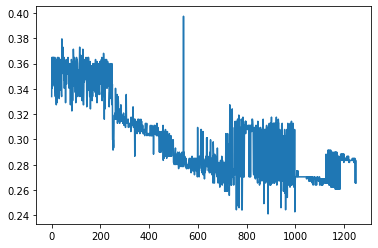

In [24]:
plt.plot(error_holder)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


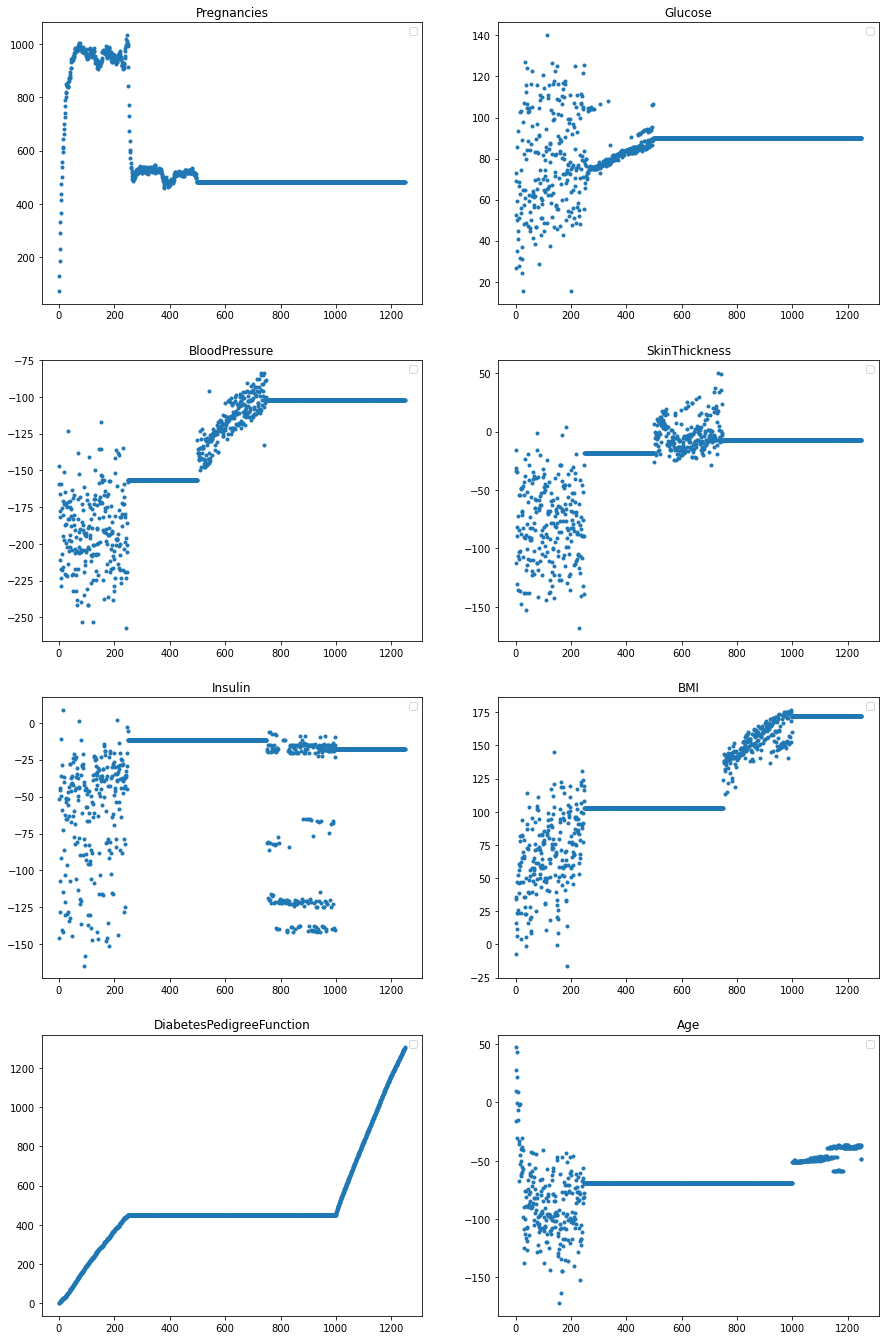

In [25]:
%matplotlib inline
plt.figure(figsize=(15,30))
counter = 0
titles = ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for i in w_plot:
    plt.subplot(5, 2, counter+1)
    plt.plot(i, '.')
    plt.title(titles[counter])
    plt.legend()
    counter+=1
plt.show()

# Sort the features

In [26]:
counter = 0
train_y_list = []
score_list = []
for i in train_y.tolist():
    train_y_list.append([i])
from sklearn.linear_model import LinearRegression
for i in combinations[0]:
    print(i)
    train_holder = []
    temp= []
    for k in train_x:
        temp.append([k[counter]])
        
    linear_model = LinearRegression().fit(temp, train_y_list)
    Score = linear_model.score(temp, train_y_list)
    print(Score)
    score_list.append([Score,i,counter])
    print('--------------------------')
    counter+=1

Pregnancies
0.037168068817795774
--------------------------
Glucose
0.21255583713131765
--------------------------
BloodPressure
0.0007170101827647102
--------------------------
SkinThickness
0.004204465202875651
--------------------------
Insulin
0.01720710777406309
--------------------------
BMI
0.0965947241701881
--------------------------
DiabetesPedigreeFunction
0.02970379098050191
--------------------------
Age
0.04978642989263793
--------------------------


In [27]:
score_list.sort(key=lambda x: x[0], reverse=True)
score_list

[[0.21255583713131765, 'Glucose', 1],
 [0.0965947241701881, 'BMI', 5],
 [0.04978642989263793, 'Age', 7],
 [0.037168068817795774, 'Pregnancies', 0],
 [0.02970379098050191, 'DiabetesPedigreeFunction', 6],
 [0.01720710777406309, 'Insulin', 4],
 [0.004204465202875651, 'SkinThickness', 3],
 [0.0007170101827647102, 'BloodPressure', 2]]

In [28]:
combinations = []
features_index = []
features_pair_holder = []
for i in score_list:
    combinations.append(i[1])
    features_pair_holder.append(i[2])
    if len(features_pair_holder)>1:
        features_index.append(features_pair_holder)
        features_pair_holder = []
combinations = [combinations]
features_index = features_index
print(combinations)
print(features_index)

[['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BloodPressure']]
[[1, 5], [7, 0], [6, 4], [3, 2]]


In [29]:
layer_num = 1
input_list = Input_Creator(combinations)
w = W_initializor(input_list,layer_num)
w = np.array(w)
train_x, test_x, train_y, test_y,train,test = train_test_split(input_list)
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)
train = np.asarray(train)
test = np.asarray(test)


update_sign = ''
l = 1
epochs = 1250
bias=[]
for i in range(layer_num):
    bias.append(0.01)
error = 1
error_holder = []
w_best = [w, bias, error]
w_holder = []

feature_selector = [0,250,500,750,1000]
features = ''
zeros_holder = train_x[0][:].copy()
zeros_holder[:] = 0
for n in range(epochs):
    if n == feature_selector[1]:
        features = features_index[0]
    elif n == feature_selector[2]:
        features = features_index[1]
    elif n == feature_selector[3]:
        features = features_index[2]
    elif n == feature_selector[4]:
        features = features_index[3]
    for i in train[0]:
        if i[len(i)-1]==0:
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod > 0:
                if n>249:
                    i_temp = i.copy()
                    i = zeros_holder.copy()
                    i[features[0]] = i_temp[features[0]]
                    i[features[1]] = i_temp[features[1]]
                w[0] = w[0] - np.dot(l,i)
                bias[0] -= l
        else:   
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod <= 0:
                if n>249:
                    i_temp = i.copy()
                    i = zeros_holder.copy()
                    i[features[0]] = i_temp[features[0]]
                    i[features[1]] = i_temp[features[1]]
                w[0] = w[0] + np.dot(l,i)
                bias[0] += l
    error = evaluation(w, train[0])
    w_0 = w[0].copy()
    w_holder.append(w_0)
    error_holder.append(error)
    print(error)
    if error < w_best[2]:
        a = w.copy()
        b = bias.copy()
        c = error
        w_best = [a,b,c]
print('w',w)
print('b',b)
print('error',error)
print('w_best',w_best)

0.3338762214983713
0.36482084690553745
0.34039087947882735
0.36482084690553745
0.34201954397394135
0.34201954397394135
0.36482084690553745
0.3566775244299674
0.36482084690553745
0.36482084690553745
0.3501628664495114
0.3534201954397394
0.3517915309446254
0.3338762214983713
0.3306188925081433
0.3469055374592834
0.36482084690553745
0.34527687296416937
0.3355048859934853
0.36482084690553745
0.36156351791530944
0.3501628664495114
0.33876221498371334
0.3355048859934853
0.36319218241042345
0.3566775244299674
0.36319218241042345
0.36319218241042345
0.36482084690553745
0.3485342019543974
0.36319218241042345
0.36482084690553745
0.3550488599348534
0.36156351791530944
0.3485342019543974
0.36156351791530944
0.36807817589576547
0.34364820846905536
0.36156351791530944
0.36319218241042345
0.36482084690553745
0.3306188925081433
0.3566775244299674
0.3583061889250814
0.3469055374592834
0.36319218241042345
0.34527687296416937
0.36482084690553745
0.3289902280130293
0.36482084690553745
0.36482084690553745


0.28338762214983715
0.32247557003257327
0.3338762214983713
0.28338762214983715
0.3127035830618892
0.3355048859934853
0.2964169381107492
0.31921824104234525
0.3241042345276873
0.3338762214983713
0.34364820846905536
0.31433224755700323
0.30944625407166126
0.32247557003257327
0.3322475570032573
0.33876221498371334
0.33713355048859933
0.2931596091205212
0.3127035830618892
0.2915309446254072
0.2964169381107492
0.2964169381107492
0.2931596091205212
0.31433224755700323
0.2947882736156352
0.2947882736156352
0.2931596091205212
0.32247557003257327
0.2915309446254072
0.3241042345276873
0.32247557003257327
0.3355048859934853
0.2915309446254072
0.3273615635179153
0.3241042345276873
0.3322475570032573
0.3273615635179153
0.3322475570032573
0.31107491856677527
0.3241042345276873
0.3273615635179153
0.3289902280130293
0.3273615635179153
0.3289902280130293
0.31107491856677527
0.3257328990228013
0.31107491856677527
0.33713355048859933
0.3241042345276873
0.3306188925081433
0.3355048859934853
0.293159609120

0.28827361563517917
0.28827361563517917
0.2899022801302932
0.28827361563517917
0.28827361563517917
0.2899022801302932
0.28827361563517917
0.28827361563517917
0.2899022801302932
0.28827361563517917
0.28827361563517917
0.2899022801302932
0.28827361563517917
0.28827361563517917
0.2899022801302932
0.28827361563517917
0.28827361563517917
0.2899022801302932
0.28827361563517917
0.28664495114006516
0.2899022801302932
0.28827361563517917
0.28664495114006516
0.2899022801302932
0.28664495114006516
0.28664495114006516
0.2899022801302932
0.28664495114006516
0.28664495114006516
0.2899022801302932
0.28664495114006516
0.2915309446254072
0.28664495114006516
0.2899022801302932
0.28664495114006516
0.28664495114006516
0.28664495114006516
0.28664495114006516
0.2899022801302932
0.28664495114006516
0.2899022801302932
0.2915309446254072
0.2899022801302932
0.28664495114006516
0.28827361563517917
0.28664495114006516
0.2899022801302932
0.2915309446254072
0.2915309446254072
0.28664495114006516
0.28501628664495116

In [30]:
error = evaluation(w, test[0])
error

0.24675324675324675

In [31]:
w_plot = []
for i in range(len(w_holder[0])):
    w_plot.append([])
for i in w_holder:
    for n in range(len(w_holder[0])):
        w_plot[n].append(i[n])

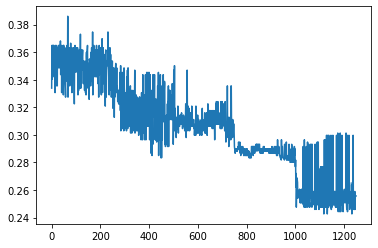

In [32]:
plt.plot(error_holder)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


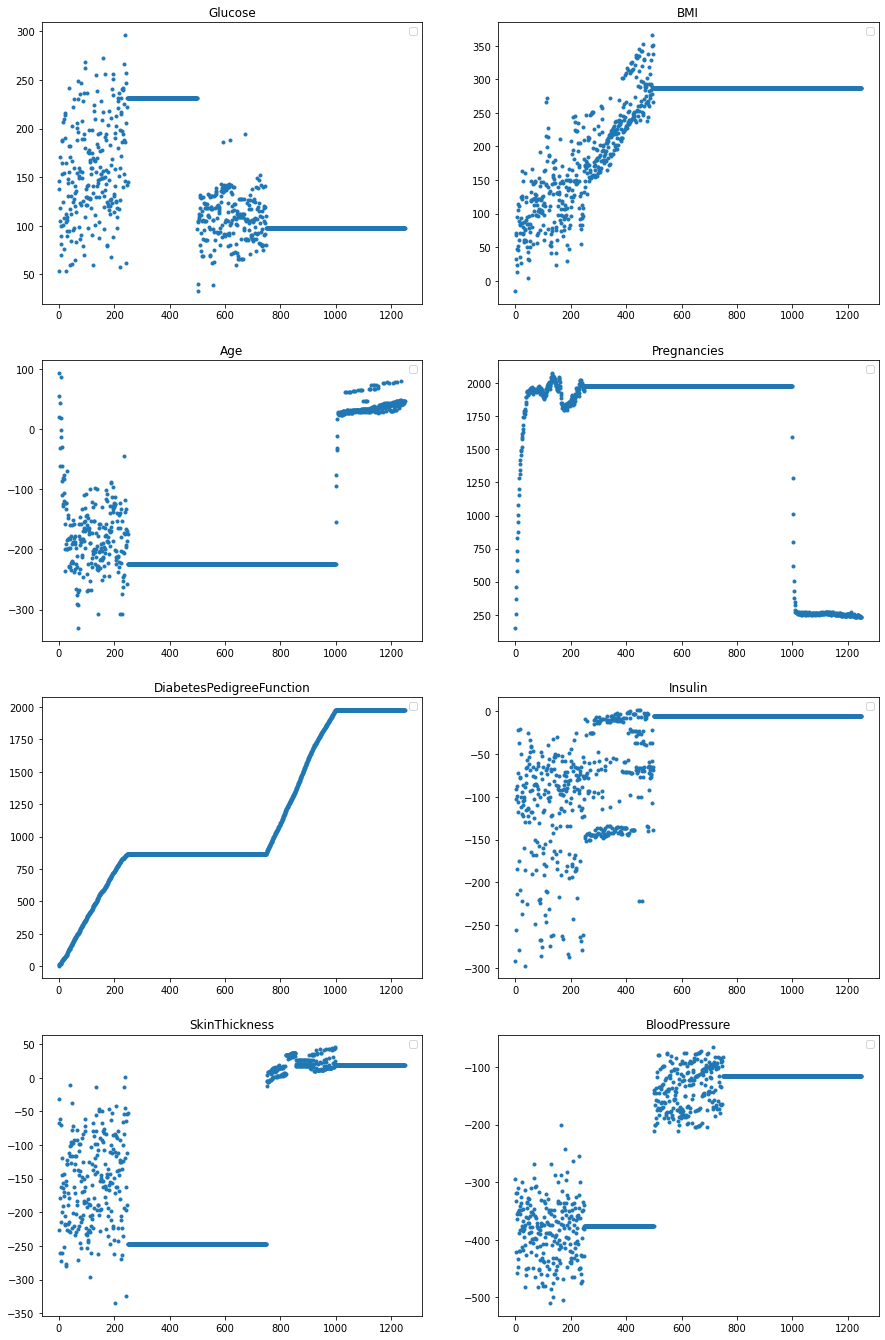

In [33]:
%matplotlib inline
plt.figure(figsize=(15,30))
counter = 0
titles =combinations[0]

for i in w_plot:
    plt.subplot(5, 2, counter+1)
    plt.plot(i, '.')
    plt.title(titles[counter])
    plt.legend()
    counter+=1
plt.show()

# Normalize the features

In [34]:
import pandas as pd
from sklearn import preprocessing

normalized_df=(df-df.min())/(df.max()-df.min())

In [35]:
normalized_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [36]:
def Input_Creator_normalized(combinations,normalized_df):
    input_list = []
    counter = 0
    for i in combinations:
        for n in range(len(normalized_df)):
            if normalized_df.values[counter][len(normalized_df.values[0])-1] ==1:
                element = np.append([float(i) for i in normalized_df[i].values[counter]], [1])
                input_list.append(element)
            else:
                element = np.append([float(i) for i in normalized_df[i].values[counter]], [0])
                input_list.append(element)
            counter+=1
    return input_list

In [37]:
layer_num = 1
# combinations = [combinations[:4], combinations[4:]]
# combinations = [combinations[0][:4]]
# combinations = [['Glucose','Age']]
input_list = Input_Creator_normalized(combinations,normalized_df)
w = W_initializor(input_list,layer_num)
# input_list = Input_Creator(combinations)
w = np.array(w)
train_x, test_x, train_y, test_y,train,test = train_test_split(input_list)
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)
train = np.asarray(train)
test = np.asarray(test)


update_sign = ''
l = 1
epochs = 1250
bias=[]
for i in range(layer_num):
    bias.append(0.01)
error = 1
error_holder = []
w_best = [w, bias, error]
w_holder = []

feature_selector = [0,250,500,750,1000]

features = ''
zeros_holder = train_x[0][:].copy()
zeros_holder[:] = 0
for n in range(epochs):
    if n == feature_selector[1]:
        features = features_index[0]
    elif n == feature_selector[2]:
        features = features_index[1]
    elif n == feature_selector[3]:
        features = features_index[2]
    elif n == feature_selector[4]:
        features = features_index[3]
    for i in train[0]:
        if i[len(i)-1]==0:
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod > 0:
                if n>249:
                    i_temp = i.copy()
                    i = zeros_holder.copy()
                    i[features[0]] = i_temp[features[0]]
                    i[features[1]] = i_temp[features[1]]
                w[0] = w[0] - np.dot(l,i)
                bias[0] -= l
        else:   
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod <= 0:
                if n>249:
                    i_temp = i.copy()
                    i = zeros_holder.copy()
                    i[features[0]] = i_temp[features[0]]
                    i[features[1]] = i_temp[features[1]]
                w[0] = w[0] + np.dot(l,i)
                bias[0] += l
    error = evaluation(w, train[0])
    w_0 = w[0].copy()
    w_holder.append(w_0)
    error_holder.append(error)
    print(error)
    if error < w_best[2]:
        a = w.copy()
        b = bias.copy()
        c = error
        w_best = [a,b,c]
print('w',w)
print('b',b)
print('error',error)
print('w_best',w_best)

0.254071661237785
0.2671009771986971
0.26547231270358307
0.30618892508143325
0.249185667752443
0.24592833876221498
0.249185667752443
0.252442996742671
0.2687296416938111
0.254071661237785
0.2752442996742671
0.252442996742671
0.23615635179153094
0.2899022801302932
0.247557003257329
0.2687296416938111
0.24429967426710097
0.24104234527687296
0.252442996742671
0.249185667752443
0.26384364820846906
0.24429967426710097
0.249185667752443
0.26058631921824105
0.24267100977198697
0.30130293159609123
0.23778501628664495
0.24429967426710097
0.255700325732899
0.24429967426710097
0.254071661237785
0.28175895765472314
0.31758957654723124
0.23941368078175895
0.2947882736156352
0.26384364820846906
0.28338762214983715
0.24592833876221498
0.247557003257329
0.250814332247557
0.26058631921824105
0.249185667752443
0.28664495114006516
0.2687296416938111
0.24104234527687296
0.247557003257329
0.2785016286644951
0.250814332247557
0.2719869706840391
0.24429967426710097
0.2736156351791531
0.23941368078175895
0.26

0.28827361563517917
0.28338762214983715
0.28338762214983715
0.2915309446254072
0.28664495114006516
0.28827361563517917
0.28338762214983715
0.28338762214983715
0.28013029315960913
0.28501628664495116
0.28501628664495116
0.28664495114006516
0.28501628664495116
0.28501628664495116
0.28501628664495116
0.28501628664495116
0.28501628664495116
0.28338762214983715
0.28501628664495116
0.28501628664495116
0.28338762214983715
0.28501628664495116
0.28664495114006516
0.28501628664495116
0.28338762214983715
0.2785016286644951
0.28501628664495116
0.28501628664495116
0.28501628664495116
0.2785016286644951
0.28501628664495116
0.28013029315960913
0.28501628664495116
0.28501628664495116
0.28338762214983715
0.28501628664495116
0.28338762214983715
0.2899022801302932
0.28501628664495116
0.28664495114006516
0.28664495114006516
0.28827361563517917
0.28338762214983715
0.28338762214983715
0.28175895765472314
0.28501628664495116
0.28501628664495116
0.28664495114006516
0.28501628664495116
0.28501628664495116
0.28

0.2785016286644951
0.2768729641693811
0.2768729641693811
0.2785016286644951
0.28013029315960913
0.2687296416938111
0.28013029315960913
0.2785016286644951
0.2687296416938111
0.28013029315960913
0.2768729641693811
0.2736156351791531
0.28175895765472314
0.2703583061889251
0.28013029315960913
0.2768729641693811
0.2719869706840391
0.28013029315960913
0.2687296416938111
0.2785016286644951
0.2785016286644951
0.2719869706840391
0.2785016286644951
0.2752442996742671
0.2736156351791531
0.2687296416938111
0.2785016286644951
0.2768729641693811
0.2719869706840391
0.28013029315960913
0.2687296416938111
0.2785016286644951
0.2768729641693811
0.2736156351791531
0.28175895765472314
0.2703583061889251
0.2785016286644951
0.2768729641693811
0.2687296416938111
0.28013029315960913
0.2768729641693811
0.2736156351791531
0.28013029315960913
0.2687296416938111
0.28013029315960913
0.2768729641693811
0.2703583061889251
0.28013029315960913
0.2687296416938111
0.28013029315960913
0.2768729641693811
0.2752442996742671

In [38]:
error = evaluation(w, test[0])
error

0.23376623376623376

In [39]:
w_plot = []
for i in range(len(w_holder[0])):
    w_plot.append([])
for i in w_holder:
    for n in range(len(w_holder[0])):
        w_plot[n].append(i[n])

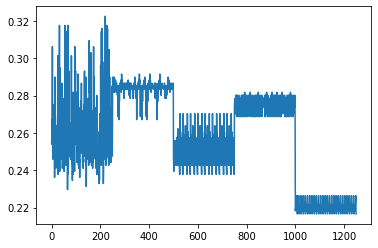

In [40]:
plt.plot(error_holder)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


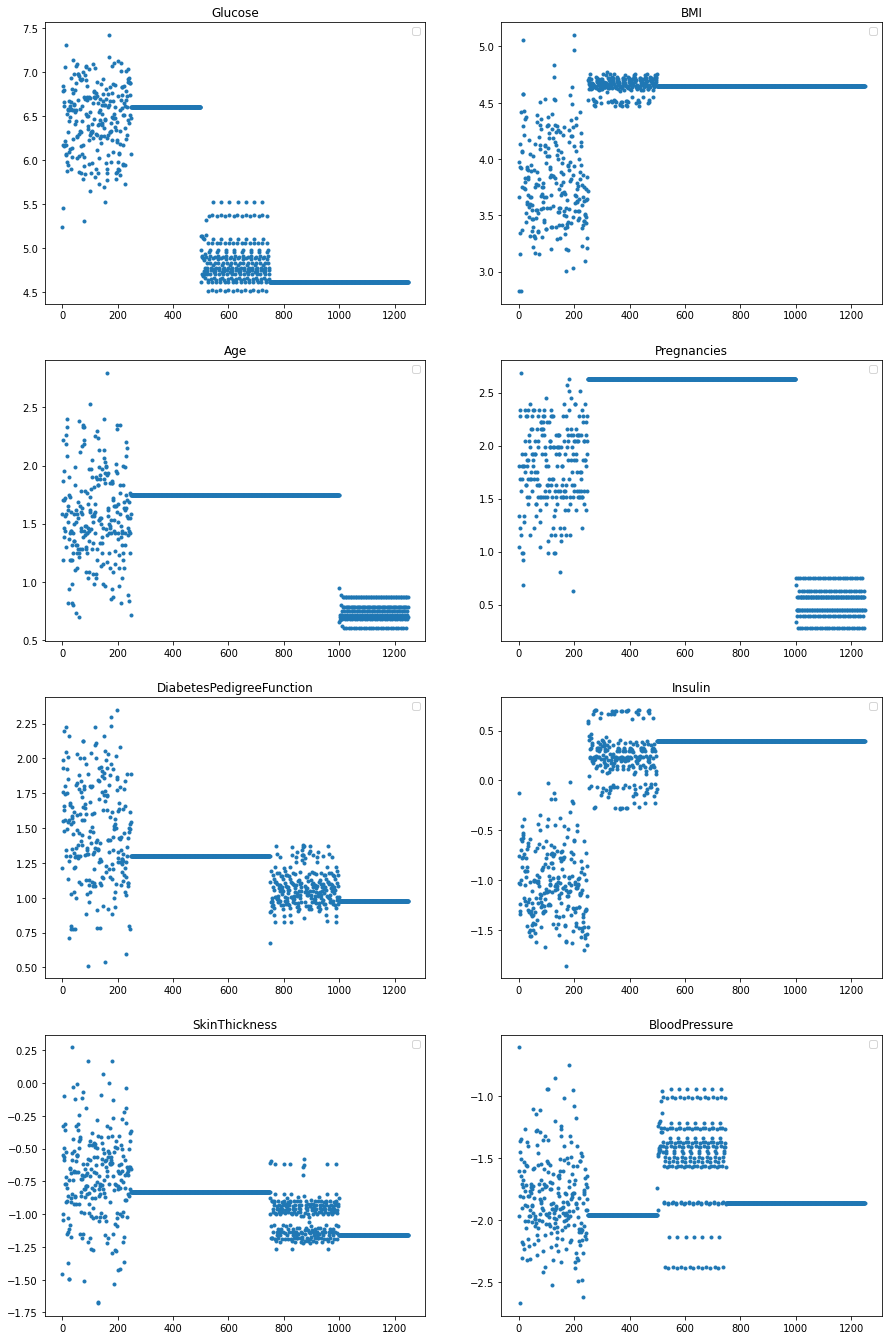

In [41]:
%matplotlib inline
plt.figure(figsize=(15,30))
counter = 0
titles =combinations[0]

for i in w_plot:
    plt.subplot(5, 2, counter+1)
    plt.plot(i, '.')
    plt.title(titles[counter])
    plt.legend()
    counter+=1
plt.show()

# Assign different different weight ratio to features according to the importance of the features

In [42]:
score_list

[[0.21255583713131765, 'Glucose', 1],
 [0.0965947241701881, 'BMI', 5],
 [0.04978642989263793, 'Age', 7],
 [0.037168068817795774, 'Pregnancies', 0],
 [0.02970379098050191, 'DiabetesPedigreeFunction', 6],
 [0.01720710777406309, 'Insulin', 4],
 [0.004204465202875651, 'SkinThickness', 3],
 [0.0007170101827647102, 'BloodPressure', 2]]

In [43]:
normalized_df_modified = normalized_df.copy()
for i in score_list:
    normalized_df_modified[i[1]] *= (400*i[0]*i[0])
normalized_df_modified

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.195030,13.440478,0.000121,0.002500,0.000000,1.868889,0.082731,0.479213,1.0
1,0.032505,7.719193,0.000111,0.002071,0.000000,1.479537,0.041140,0.165246,0.0
2,0.260041,16.618969,0.000108,0.000000,0.000000,1.295986,0.089512,0.181770,1.0
3,0.032505,8.082449,0.000111,0.001643,0.013159,1.562970,0.013412,0.000000,0.0
4,0.000000,12.441523,0.000067,0.002500,0.023519,2.397295,0.333034,0.198295,1.0
...,...,...,...,...,...,...,...,...,...
763,0.325051,9.172218,0.000128,0.003428,0.025199,1.829954,0.014015,0.694033,0.0
764,0.065010,11.079313,0.000118,0.001928,0.000000,2.046879,0.039482,0.099148,0.0
765,0.162525,10.988499,0.000121,0.001643,0.015679,1.457289,0.025166,0.148721,0.0
766,0.032505,11.442569,0.000101,0.000000,0.000000,1.674213,0.040838,0.429639,1.0


In [44]:
layer_num = 1
# combinations = [combinations[:4], combinations[4:]]
# combinations = [combinations[0][:4]]
# combinations = [['Glucose','Age']]
input_list = Input_Creator_normalized(combinations,normalized_df_modified)
w = W_initializor(input_list,layer_num)
# input_list = Input_Creator(combinations)
w = np.array(w)
train_x, test_x, train_y, test_y,train,test = train_test_split(input_list)
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)
train = np.asarray(train)
test = np.asarray(test)


update_sign = ''
l = 1
epochs = 1250
bias=[]
for i in range(layer_num):
    bias.append(0.01)
error = 1
error_holder = []
w_best = [w, bias, error]
w_holder = []

feature_selector = [0,250,500,750,1000]

features = ''
zeros_holder = train_x[0][:].copy()
zeros_holder[:] = 0
for n in range(epochs):
    if n == feature_selector[1]:
        features = features_index[0]
    elif n == feature_selector[2]:
        features = features_index[1]
    elif n == feature_selector[3]:
        features = features_index[2]
    elif n == feature_selector[4]:
        features = features_index[3]
    for i in train[0]:
        if i[len(i)-1]==0:
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod > 0:
                if n>249:
                    i_temp = i.copy()
                    i = zeros_holder.copy()
                    i[features[0]] = i_temp[features[0]]
                    i[features[1]] = i_temp[features[1]]
                w[0] = w[0] - np.dot(l,i)
                bias[0] -= l
        else:   
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod <= 0:
                if n>249:
                    i_temp = i.copy()
                    i = zeros_holder.copy()
                    i[features[0]] = i_temp[features[0]]
                    i[features[1]] = i_temp[features[1]]
                w[0] = w[0] + np.dot(l,i)
                bias[0] += l
    error = evaluation(w, train[0])
    w_0 = w[0].copy()
    w_holder.append(w_0)
    error_holder.append(error)
    print(error)
    if error < w_best[2]:
        a = w.copy()
        b = bias.copy()
        c = error
        w_best = [a,b,c]
print('w',w)
print('b',b)
print('error',error)
print('w_best',w_best)

0.35993485342019543
0.35993485342019543
0.35993485342019543
0.31921824104234525
0.25895765472312704
0.31433224755700323
0.26221498371335505
0.255700325732899
0.25895765472312704
0.254071661237785
0.249185667752443
0.26547231270358307
0.30293159609120524
0.3127035830618892
0.30293159609120524
0.30618892508143325
0.2899022801302932
0.2719869706840391
0.2703583061889251
0.2671009771986971
0.24267100977198697
0.247557003257329
0.25895765472312704
0.23452768729641693
0.23127035830618892
0.3273615635179153
0.32084690553745926
0.3485342019543974
0.3485342019543974
0.25895765472312704
0.3485342019543974
0.24104234527687296
0.2996742671009772
0.3241042345276873
0.31921824104234525
0.28827361563517917
0.30618892508143325
0.30456026058631924
0.30456026058631924
0.28501628664495116
0.28175895765472314
0.2785016286644951
0.2768729641693811
0.2768729641693811
0.23778501628664495
0.24104234527687296
0.25895765472312704
0.30456026058631924
0.3127035830618892
0.255700325732899
0.255700325732899
0.25570

0.2703583061889251
0.26058631921824105
0.2752442996742671
0.2671009771986971
0.2752442996742671
0.26384364820846906
0.2736156351791531
0.26221498371335505
0.26221498371335505
0.26221498371335505
0.26221498371335505
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.2752442996742671
0.26547231270358307
0.2736156351791531
0.26384364820846906
0.2736156351791531
0.26384364820846906
0.26221498371335505
0.26221498371335505
0.26221498371335505
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.2736156351791531
0.26547231270358307
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26221498371335505
0.26221498371335505
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.2605863

0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.255700325732899
0.255700325732899
0.255700325732899
0.254071661237785
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.255700325732899
0.25570032

In [45]:
error = evaluation(w, test[0])
error

0.21428571428571427

In [46]:
w_plot = []
for i in range(len(w_holder[0])):
    w_plot.append([])
for i in w_holder:
    for n in range(len(w_holder[0])):
        w_plot[n].append(i[n])

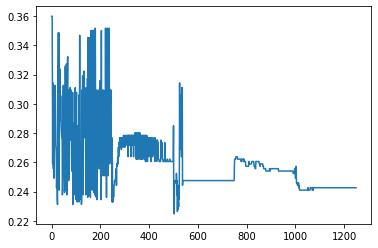

In [47]:
plt.plot(error_holder)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


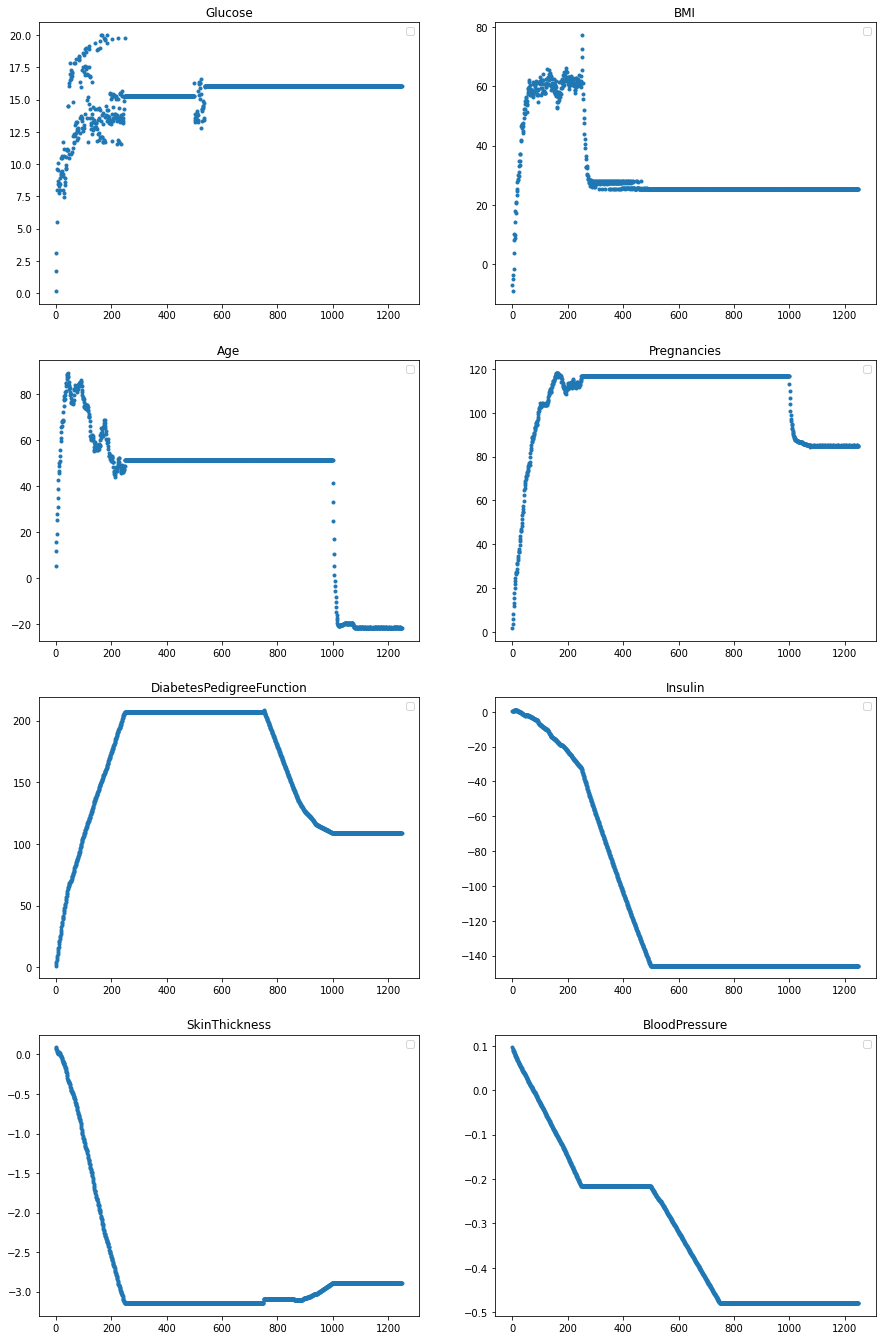

In [48]:
%matplotlib inline
plt.figure(figsize=(15,30))
counter = 0
titles =combinations[0]

for i in w_plot:
    plt.subplot(5, 2, counter+1)
    plt.plot(i, '.')
    plt.title(titles[counter])
    plt.legend()
    counter+=1
plt.show()

# Reduce Learning Rate

In [49]:
layer_num = 1
# combinations = [combinations[:4], combinations[4:]]
# combinations = [combinations[0][:4]]
# combinations = [['Glucose','Age']]
input_list = Input_Creator_normalized(combinations,normalized_df_modified)
w = W_initializor(input_list,layer_num)
# input_list = Input_Creator(combinations)
w = np.array(w)
train_x, test_x, train_y, test_y,train,test = train_test_split(input_list)
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)
train = np.asarray(train)
test = np.asarray(test)


update_sign = ''
l = 0.1
epochs = 1250
bias=[]
for i in range(layer_num):
    bias.append(0.01)
error = 1
error_holder = []
w_best = [w, bias, error]
w_holder = []

feature_selector = [0,250,500,750,1000]

features = ''
zeros_holder = train_x[0][:].copy()
zeros_holder[:] = 0
for n in range(epochs):
    if n == feature_selector[1]:
        features = features_index[0]
    elif n == feature_selector[2]:
        features = features_index[1]
    elif n == feature_selector[3]:
        features = features_index[2]
    elif n == feature_selector[4]:
        features = features_index[3]
    for i in train[0]:
        if i[len(i)-1]==0:
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod > 0:
                if n>249:
                    i_temp = i.copy()
                    i = zeros_holder.copy()
                    i[features[0]] = i_temp[features[0]]
                    i[features[1]] = i_temp[features[1]]
                w[0] = w[0] - np.dot(l,i)
                bias[0] -= l
        else:   
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod <= 0:
                if n>249:
                    i_temp = i.copy()
                    i = zeros_holder.copy()
                    i[features[0]] = i_temp[features[0]]
                    i[features[1]] = i_temp[features[1]]
                w[0] = w[0] + np.dot(l,i)
                bias[0] += l
    error = evaluation(w, train[0])
    w_0 = w[0].copy()
    w_holder.append(w_0)
    error_holder.append(error)
    print(error)
    if error < w_best[2]:
        a = w.copy()
        b = bias.copy()
        c = error
        w_best = [a,b,c]
print('w',w)
print('b',b)
print('error',error)
print('w_best',w_best)

0.35993485342019543
0.3534201954397394
0.3469055374592834
0.31758957654723124
0.3257328990228013
0.30944625407166126
0.35993485342019543
0.35993485342019543
0.252442996742671
0.250814332247557
0.25732899022801303
0.30130293159609123
0.30130293159609123
0.30130293159609123
0.2703583061889251
0.26547231270358307
0.28013029315960913
0.2671009771986971
0.24429967426710097
0.247557003257329
0.250814332247557
0.24104234527687296
0.250814332247557
0.30456026058631924
0.23941368078175895
0.24429967426710097
0.26547231270358307
0.32084690553745926
0.252442996742671
0.254071661237785
0.3485342019543974
0.249185667752443
0.3485342019543974
0.3485342019543974
0.3127035830618892
0.30293159609120524
0.28501628664495116
0.30456026058631924
0.2899022801302932
0.28501628664495116
0.2785016286644951
0.3257328990228013
0.30618892508143325
0.30130293159609123
0.2980456026058632
0.24429967426710097
0.24104234527687296
0.30944625407166126
0.254071661237785
0.23941368078175895
0.255700325732899
0.33061889250

0.2736156351791531
0.2752442996742671
0.2736156351791531
0.2736156351791531
0.2752442996742671
0.2736156351791531
0.2752442996742671
0.2736156351791531
0.2736156351791531
0.2752442996742671
0.2736156351791531
0.2719869706840391
0.2736156351791531
0.2736156351791531
0.2752442996742671
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2752442996742671
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2752442996742671
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2719869706840391
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2719869706840391
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2719869706840391
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.2736156351791531
0.23289902280130292
0.247557003257329
0.2524429967

0.252442996742671
0.252442996742671
0.252442996742671
0.252442996742671
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.254071661237785
0.25407166

In [50]:
error = evaluation(w, test[0])
error

0.2012987012987013

In [51]:
w_plot = []
for i in range(len(w_holder[0])):
    w_plot.append([])
for i in w_holder:
    for n in range(len(w_holder[0])):
        w_plot[n].append(i[n])

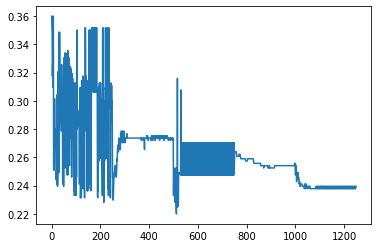

In [52]:
plt.plot(error_holder)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


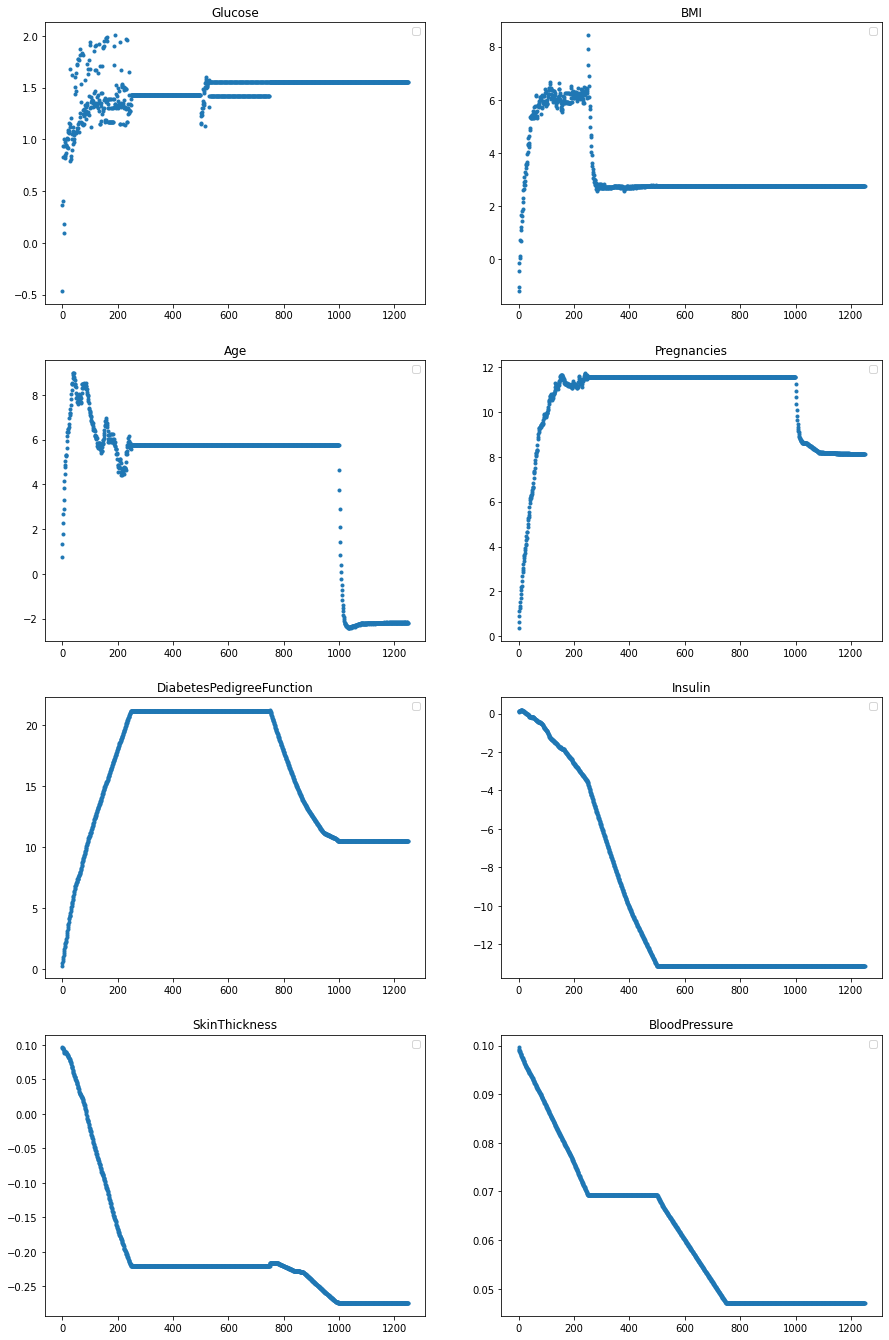

In [53]:
%matplotlib inline
plt.figure(figsize=(15,30))
counter = 0
titles =combinations[0]

for i in w_plot:
    plt.subplot(5, 2, counter+1)
    plt.plot(i, '.')
    plt.title(titles[counter])
    plt.legend()
    counter+=1
plt.show()

# Not updating weight when a feature is bad

In [54]:
layer_num = 1
# combinations = [combinations[:4], combinations[4:]]
# combinations = [combinations[0][:4]]
# combinations = [['Glucose','Age']]
input_list = Input_Creator_normalized(combinations,normalized_df_modified)
w = W_initializor(input_list,layer_num)
# input_list = Input_Creator(combinations)
w = np.array(w)
train_x, test_x, train_y, test_y,train,test = train_test_split(input_list)
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)
train = np.asarray(train)
test = np.asarray(test)


update_sign = ''
l = 1
epochs = 1250
bias=[]
for i in range(layer_num):
    bias.append(0.01)
error = 1
error_holder = []
w_best = [w, bias, error]
w_holder = []

feature_selector = [0,250,500,750,1000]

features = ''
zeros_holder = train_x[0][:].copy()
zeros_holder[:] = 0
w_0_holder =[]
for n in range(epochs):
    if n == feature_selector[1]:
#         if error > (w_best[2]*1.1):
#             w[0] = w_0_holder
        features = features_index[0]
        w_0_holder = w[0].copy()
    elif n == feature_selector[2]:
        if error > (w_best[2]*1.1):
            w[0] = w_0_holder
        w_0_holder = w[0].copy()
        features = features_index[1]
    elif n == feature_selector[3]:
        if error > (w_best[2]*1.1):
            w[0] = w_0_holder
        w_0_holder = w[0].copy()
        features = features_index[2]
    elif n == feature_selector[4]:
        if error > (w_best[2]*1.1):
            w[0] = w_0_holder
        w_0_holder = w[0].copy()
        features = features_index[3]
    for i in train[0]:
        if i[len(i)-1]==0:
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod > 0:
                if n>249:
                    i_temp = i.copy()
                    i = zeros_holder.copy()
                    i[features[0]] = i_temp[features[0]]
                    i[features[1]] = i_temp[features[1]]
                w[0] = w[0] - np.dot(l,i)
                bias[0] -= l
        else:   
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod <= 0:
                if n>249:
                    i_temp = i.copy()
                    i = zeros_holder.copy()
                    i[features[0]] = i_temp[features[0]]
                    i[features[1]] = i_temp[features[1]]
                
                w[0] = w[0] + np.dot(l,i)
                bias[0] += l
    error = evaluation(w, train[0])
    w_0 = w[0].copy()
    w_holder.append(w_0)
    error_holder.append(error)
    print(error)
    if error < w_best[2]:
        a = w.copy()
        b = bias.copy()
        c = error
        w_best = [a,b,c]
        
print('w',w)
print('b',b)
print('error',error)
print('w_best',w_best)

0.35993485342019543
0.35993485342019543
0.35993485342019543
0.31921824104234525
0.25895765472312704
0.31433224755700323
0.26221498371335505
0.255700325732899
0.25895765472312704
0.254071661237785
0.249185667752443
0.26547231270358307
0.30293159609120524
0.3127035830618892
0.30293159609120524
0.30618892508143325
0.2899022801302932
0.2719869706840391
0.2703583061889251
0.2671009771986971
0.24267100977198697
0.247557003257329
0.25895765472312704
0.23452768729641693
0.23127035830618892
0.3273615635179153
0.32084690553745926
0.3485342019543974
0.3485342019543974
0.25895765472312704
0.3485342019543974
0.24104234527687296
0.2996742671009772
0.3241042345276873
0.31921824104234525
0.28827361563517917
0.30618892508143325
0.30456026058631924
0.30456026058631924
0.28501628664495116
0.28175895765472314
0.2785016286644951
0.2768729641693811
0.2768729641693811
0.23778501628664495
0.24104234527687296
0.25895765472312704
0.30456026058631924
0.3127035830618892
0.255700325732899
0.255700325732899
0.25570

0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.2752442996742671
0.26547231270358307
0.2736156351791531
0.26384364820846906
0.2736156351791531
0.26384364820846906
0.26221498371335505
0.26221498371335505
0.26221498371335505
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.2736156351791531
0.26547231270358307
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26221498371335505
0.26221498371335505
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26221498371335505
0.26221498371335505
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26058631921824105
0.26

0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.23941368078175895
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296
0.24104234527687296


In [55]:
error = evaluation(w, test[0])
error

0.2012987012987013

In [56]:
w_plot = []
for i in range(len(w_holder[0])):
    w_plot.append([])
for i in w_holder:
    for n in range(len(w_holder[0])):
        w_plot[n].append(i[n])

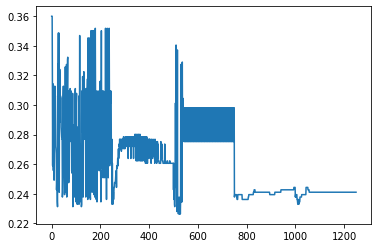

In [57]:
plt.plot(error_holder)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


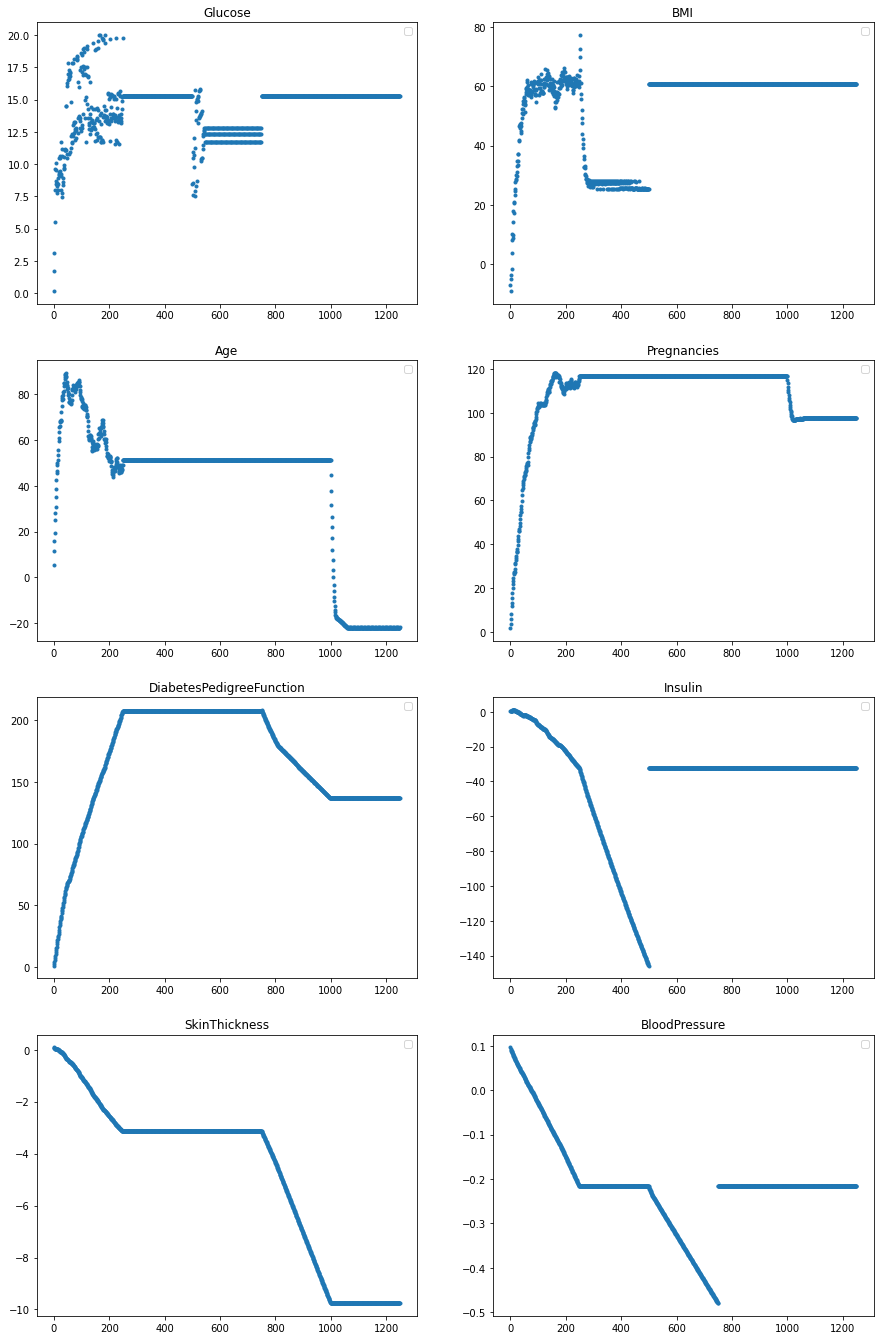

In [58]:
%matplotlib inline
plt.figure(figsize=(15,30))
counter = 0
titles =combinations[0]

for i in w_plot:
    plt.subplot(5, 2, counter+1)
    plt.plot(i, '.')
    plt.title(titles[counter])
    plt.legend()
    counter+=1
plt.show()

# Starting with 0 weight

In [59]:
combinations

[['Glucose',
  'BMI',
  'Age',
  'Pregnancies',
  'DiabetesPedigreeFunction',
  'Insulin',
  'SkinThickness',
  'BloodPressure']]

In [60]:
normalized_df_modified

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.195030,13.440478,0.000121,0.002500,0.000000,1.868889,0.082731,0.479213,1.0
1,0.032505,7.719193,0.000111,0.002071,0.000000,1.479537,0.041140,0.165246,0.0
2,0.260041,16.618969,0.000108,0.000000,0.000000,1.295986,0.089512,0.181770,1.0
3,0.032505,8.082449,0.000111,0.001643,0.013159,1.562970,0.013412,0.000000,0.0
4,0.000000,12.441523,0.000067,0.002500,0.023519,2.397295,0.333034,0.198295,1.0
...,...,...,...,...,...,...,...,...,...
763,0.325051,9.172218,0.000128,0.003428,0.025199,1.829954,0.014015,0.694033,0.0
764,0.065010,11.079313,0.000118,0.001928,0.000000,2.046879,0.039482,0.099148,0.0
765,0.162525,10.988499,0.000121,0.001643,0.015679,1.457289,0.025166,0.148721,0.0
766,0.032505,11.442569,0.000101,0.000000,0.000000,1.674213,0.040838,0.429639,1.0


In [61]:
features_index

[[1, 5], [7, 0], [6, 4], [3, 2]]

In [62]:
layer_num = 1
# combinations = [combinations[:4], combinations[4:]]
# combinations = [combinations[0][:4]]
# combinations = [['Glucose','Age']]
input_list = Input_Creator_normalized(combinations,normalized_df_modified)
w = W_initializor(input_list,layer_num)
# input_list = Input_Creator(combinations)
w = np.array(w)
w[:] = 0
train_x, test_x, train_y, test_y,train,test = train_test_split(input_list)
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)
train = np.asarray(train)
test = np.asarray(test)


update_sign = ''
l = 1
epochs = 1250
bias=[]
for i in range(layer_num):
    bias.append(0.01)
error = 1
error_holder = []
w_best = [w, bias, error]
w_holder = []

feature_selector = [0,0,500,750,1000]

features = ''
zeros_holder = train_x[0][:].copy()
zeros_holder[:] = 0
# w_0_holder =[]
for n in range(epochs):
    if n == feature_selector[1]:
        if error > (w_best[2]*1.1):
            w[0] = w_0_holder
        features = features_index[0]
        w_0_holder = w[0].copy()
    elif n == feature_selector[2]:
        if error > (w_best[2]*1.1):
            w[0] = w_0_holder
        w_0_holder = w[0].copy()
        features = features_index[1]
    elif n == feature_selector[3]:
        if error > (w_best[2]*1.1):
            w[0] = w_0_holder
        w_0_holder = w[0].copy()
        features = features_index[2]
    elif n == feature_selector[4]:
        if error > (w_best[2]*1.1):
            w[0] = w_0_holder
        w_0_holder = w[0].copy()
        features = features_index[3]
    for i in train[0]:
        if i[len(i)-1]==0:
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod > 0:
                if n>249:
                    i_temp = i.copy()
                    i = zeros_holder.copy()
                    i[features[0]] = i_temp[features[0]]
                    i[features[1]] = i_temp[features[1]]
                w[0] = w[0] - np.dot(l,i)
                bias[0] -= l
        else:   
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod <= 0:
                if n>249:
                    i_temp = i.copy()
                    i = zeros_holder.copy()
                    i[features[0]] = i_temp[features[0]]
                    i[features[1]] = i_temp[features[1]]
                
                w[0] = w[0] + np.dot(l,i)
                bias[0] += l
    error = evaluation(w, train[0])
    w_0 = w[0].copy()
    w_holder.append(w_0)
    error_holder.append(error)
    print(error)
    if error < w_best[2]:
        a = w.copy()
        b = bias.copy()
        c = error
        w_best = [a,b,c]
        
print('w',w)
print('b',b)
print('error',error)
print('w_best',w_best)

0.34527687296416937
0.35993485342019543
0.34364820846905536
0.255700325732899
0.26384364820846906
0.2703583061889251
0.35993485342019543
0.35993485342019543
0.24592833876221498
0.25895765472312704
0.2964169381107492
0.30130293159609123
0.3127035830618892
0.30618892508143325
0.2768729641693811
0.2996742671009772
0.247557003257329
0.26058631921824105
0.26221498371335505
0.249185667752443
0.249185667752443
0.30456026058631924
0.23127035830618892
0.2296416938110749
0.24429967426710097
0.35993485342019543
0.2280130293159609
0.31758957654723124
0.3485342019543974
0.3485342019543974
0.24592833876221498
0.3469055374592834
0.30781758957654726
0.24104234527687296
0.32247557003257327
0.30618892508143325
0.2980456026058632
0.3127035830618892
0.2996742671009772
0.33713355048859933
0.2964169381107492
0.28338762214983715
0.28013029315960913
0.23778501628664495
0.23452768729641693
0.24104234527687296
0.28338762214983715
0.24104234527687296
0.23778501628664495
0.34364820846905536
0.25732899022801303
0.

0.2671009771986971
0.2671009771986971
0.2671009771986971
0.2671009771986971
0.2671009771986971
0.2671009771986971
0.2687296416938111
0.2687296416938111
0.2671009771986971
0.2671009771986971
0.2671009771986971
0.2671009771986971
0.2671009771986971
0.2671009771986971
0.2671009771986971
0.2687296416938111
0.2687296416938111
0.2687296416938111
0.2671009771986971
0.2687296416938111
0.2687296416938111
0.2703583061889251
0.2719869706840391
0.2703583061889251
0.2703583061889251
0.2703583061889251
0.2703583061889251
0.2703583061889251
0.2703583061889251
0.2703583061889251
0.2719869706840391
0.2703583061889251
0.2703583061889251
0.2703583061889251
0.2687296416938111
0.2719869706840391
0.2752442996742671
0.2736156351791531
0.2719869706840391
0.2703583061889251
0.2736156351791531
0.2719869706840391
0.2719869706840391
0.2719869706840391
0.2719869706840391
0.2719869706840391
0.2719869706840391
0.2719869706840391
0.2719869706840391
0.2719869706840391
0.2719869706840391
0.2719869706840391
0.2719869706

0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3469055374592834
0.3485342019543974
0.3469055374592834
0.3485342019543974
0.3469055374

In [63]:
error = evaluation(w, test[0])
error

0.3246753246753247

In [64]:
w_plot = []
for i in range(len(w_holder[0])):
    w_plot.append([])
for i in w_holder:
    for n in range(len(w_holder[0])):
        w_plot[n].append(i[n])

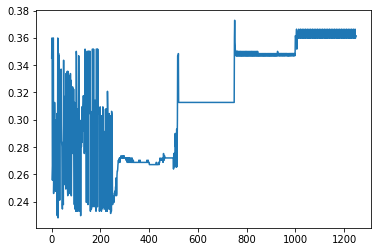

In [65]:
plt.plot(error_holder)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


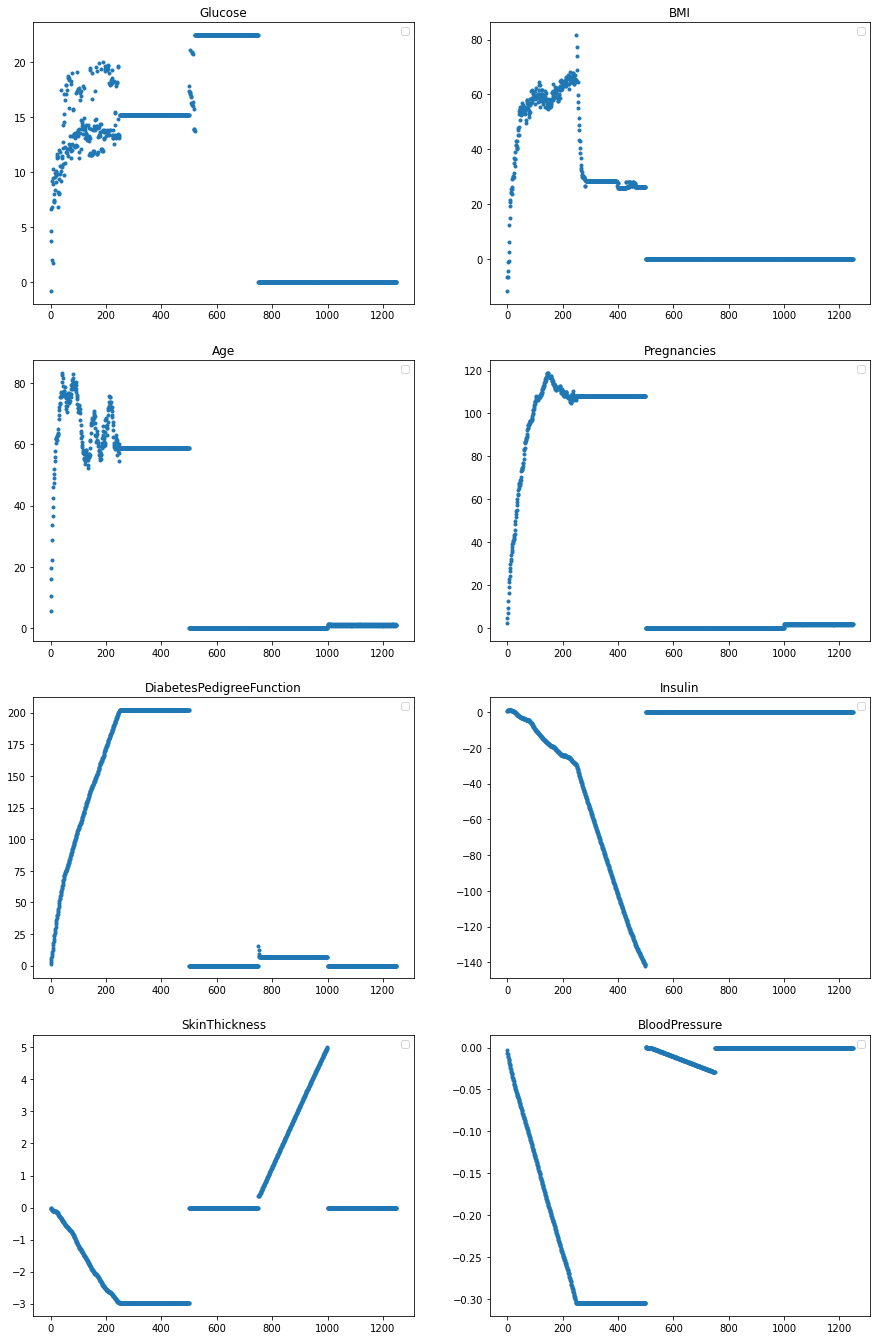

In [66]:
%matplotlib inline
plt.figure(figsize=(15,30))
counter = 0
titles =combinations[0]

for i in w_plot:
    plt.subplot(5, 2, counter+1)
    plt.plot(i, '.')
    plt.title(titles[counter])
    plt.legend()
    counter+=1
plt.show()

# Other experiment

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)

model = Sequential()
model.add(Dense(1, input_dim=4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, epochs=10000, batch_size=10)

counter = 0
predicted = model.predict(test_x)

for i in range(len(test_x)):
    if predicted[i] >0.5:
        predicted[i]=1
    else:
        predicted[i]=0
    if predicted[i] == test_y[i]:
        counter+=1
accuracy = counter/len(test_x)
accuracy



Insulin Age


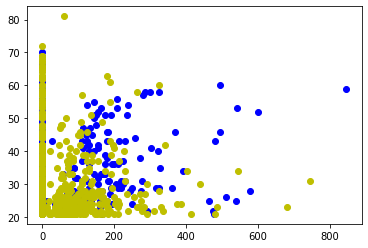

In [44]:
NAME = [
 'Insulin',
 'Age']
for i in ['Insulin']:
    for k in ['Age']:
        print()
        print(i,k)
        x  = df.loc[df['Outcome'] == 1.0][i]

        y = df.loc[df['Outcome'] == 1.0][k]

        plt.scatter(x, y, c = 'b')

        x  = df.loc[df['Outcome'] == 0.0][i]

        y = df.loc[df['Outcome'] == 0.0][k]

        plt.scatter(x, y, c = 'y')
        plt.show()

### Single Layer Perceptron with Sigmoid Activation Function

In [102]:
# Glucose Pregnancies
# SkinThickness Age
# BMI BloodPressure


In [114]:
inputs = df[['Age','Insulin','Outcome']]
inputs

,Age,Insulin,Outcome
0,50,0,1
1,31,0,0
2,32,0,1
3,21,94,0
4,33,168,1
...,...,...,...
763,63,180,0
764,27,0,0
765,30,112,0
766,47,0,1


In [115]:
square = np.square(inputs)

# modified_input = []
# for i in range(len(square)):
#     temp_list = []
#     for n in inputs[i]:
#         temp_list.append(n)
#     for n in square[i]:
#         temp_list.append(n)
#     temp_list.append(test_y[i])
#     modified_input.append(temp_list)
modified_input = inputs
modified_input
modified_input = np.asarray(modified_input)
modified_input

array([[ 50,   0,   1],
       [ 31,   0,   0],
       [ 32,   0,   1],
       ...,
       [ 30, 112,   0],
       [ 47,   0,   1],
       [ 23,   0,   0]])

In [116]:
w = W_initializor(modified_input,layer_num)
w = np.array(w)
w

import random
def train_test_split(input_list):
    random.shuffle(input_list)
    train_length = int(0.8*len(input_list))
    test_length = len(input_list) - train_length
    train = [input_list[:train_length]]
    test = [input_list[train_length:]]
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    for i in train[0]:
        train_x.append(i[:len(i)-1])
        train_y.append(i[len(i)-1])
    for i in test[0]:
        test_x.append(i[:len(i)-1])
        test_y.append(i[len(i)-1])
    return train_x, test_x, train_y, test_y,train,test
train_x_test, test_x_test, train_y_test, test_y_test,train_test,test_test = train_test_split(modified_input)

train_x_test = np.asarray(train_x_test)
train_y_test = np.asarray(train_y_test)
test_x_test = np.asarray(test_x_test)
test_y_test = np.asarray(test_y_test)
train_test = np.asarray(train_test)
test_test = np.asarray(test_test)

In [117]:
import math

update_sign = ''
l = 0.3
epochs = 150
bias=[]
for i in range(layer_num):
    bias.append(0.1)
error = 1
w_best = [w, bias, error]
def evaluation(w, input_list):
    errors_counter = 0
    total = len(input_list)
    for i in input_list:
        if i[len(i)-1]==0:
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod > 0:
                errors_counter+=1
        else:   
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod <= 0:
                errors_counter+=1
#     print(errors_counter,total)
    error = float(errors_counter/total)
    return error
for n in range(epochs):
    for i in train_test[0]:
        if i[len(i)-1]==0:
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod > 0:
                w[0] = w[0] - np.dot(l,i)
                bias[0] -= l
        else:   
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#                 print(prod)
#             prod = np.dot(i, w.T)+bias
            if prod <= 0:
                w[0] = w[0] + np.dot(l,i)
                bias[0] += l
    error = evaluation(w, train_test[0])
    print(error)
    if error < w_best[2]:
        w_best = [w,bias, error]

w_best

0.495114006514658
0.495114006514658
0.3957654723127036
0.3957654723127036
0.3957654723127036
0.3957654723127036
0.495114006514658
0.3957654723127036
0.3957654723127036
0.3957654723127036
0.3957654723127036
0.3957654723127036
0.4169381107491857
0.40390879478827363
0.3957654723127036
0.3957654723127036
0.3957654723127036
0.39087947882736157
0.3973941368078176
0.4022801302931596
0.3990228013029316
0.3941368078175896
0.38925081433224756
0.4022801302931596
0.4169381107491857
0.39087947882736157
0.4169381107491857
0.39087947882736157
0.41205211726384366
0.41205211726384366
0.38599348534201955
0.38436482084690554
0.4169381107491857
0.38599348534201955
0.38925081433224756
0.38925081433224756
0.38599348534201955
0.3941368078175896
0.4022801302931596
0.38925081433224756
0.38599348534201955
0.38599348534201955
0.38599348534201955
0.3941368078175896
0.41205211726384366
0.38599348534201955
0.495114006514658
0.3941368078175896
0.39087947882736157
0.38273615635179153
0.3941368078175896
0.390879478827

[array([[ 33.4, -68. ]]), [-785.5999999999722], 0.36807817589576547]

In [97]:
inputs = df[['BMI','BloodPressure','Outcome']]
inputs

,BMI,BloodPressure,Outcome
0,33.6,72,1
1,26.6,66,0
2,23.3,64,1
3,28.1,66,0
4,43.1,40,1
...,...,...,...
763,32.9,76,0
764,36.8,70,0
765,26.2,72,0
766,30.1,60,1


In [109]:
inputs = df[['Age','Insulin','Outcome']]
inputs = np.asarray(inputs)
square = np.asarray(square)
modified_input = []
for i in range(len(square)):
    temp_list = []
    for n in inputs[i]:
        temp_list.append(n)
    temp_list = temp_list[:-1]
    for n in square[i]:
        temp_list.append(n)
    modified_input.append(temp_list)
modified_input = np.asarray(modified_input)
modified_input

array([[5.00000e+01, 0.00000e+00, 1.12896e+03, 5.18400e+03, 1.00000e+00],
       [3.10000e+01, 0.00000e+00, 7.07560e+02, 4.35600e+03, 0.00000e+00],
       [3.20000e+01, 0.00000e+00, 5.42890e+02, 4.09600e+03, 1.00000e+00],
       ...,
       [3.00000e+01, 1.12000e+02, 6.86440e+02, 5.18400e+03, 0.00000e+00],
       [4.70000e+01, 0.00000e+00, 9.06010e+02, 3.60000e+03, 1.00000e+00],
       [2.30000e+01, 0.00000e+00, 9.24160e+02, 4.90000e+03, 0.00000e+00]])

In [110]:
w = W_initializor(modified_input,layer_num)
w = np.array(w)
w

import random
def train_test_split(input_list):
    random.shuffle(input_list)
    train_length = int(0.8*len(input_list))
    test_length = len(input_list) - train_length
    train = [input_list[:train_length]]
    test = [input_list[train_length:]]
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    for i in train[0]:
        train_x.append(i[:len(i)-1])
        train_y.append(i[len(i)-1])
    for i in test[0]:
        test_x.append(i[:len(i)-1])
        test_y.append(i[len(i)-1])
    return train_x, test_x, train_y, test_y,train,test
train_x_test, test_x_test, train_y_test, test_y_test,train_test,test_test = train_test_split(modified_input)

train_x_test = np.asarray(train_x_test)
train_y_test = np.asarray(train_y_test)
test_x_test = np.asarray(test_x_test)
test_y_test = np.asarray(test_y_test)
train_test = np.asarray(train_test)
test_test = np.asarray(test_test)

In [113]:
import math

update_sign = ''
l = 1
epochs = 1000
bias=[]
for i in range(layer_num):
    bias.append(0.1)
error = 1
w_best = [w, bias, error]
def evaluation(w, input_list):
    errors_counter = 0
    total = len(input_list)
    for i in input_list:
        if i[len(i)-1]==0:
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod > 0:
                errors_counter+=1
        else:   
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod <= 0:
                errors_counter+=1
#     print(errors_counter,total)
    error = float(errors_counter/total)
    return error
for n in range(epochs):
    for i in train_test[0]:
        if i[len(i)-1]==0:
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#             prod = np.dot(i, w.T)+bias
            if prod > 0:
                w[0] = w[0] - np.dot(l,i)
                bias[0] -= l
        else:   
            i = i[:(len(i)-1)]
            counter = 0
            for u in w:
                if counter ==0:
                    prod = np.dot(i, u.T)+bias[counter]
                else:
                    prod = np.dot(prod, u.T)+bias[counter]
                counter+=1
#                 print(prod)
#             prod = np.dot(i, w.T)+bias
            if prod <= 0:
                w[0] = w[0] + np.dot(l,i)
                bias[0] += l
    error = evaluation(w, train_test[0])
    print(error)
    if error < w_best[2]:
        w_best = [w,bias, error]

w_best

0.3762214983713355
0.38599348534201955
0.38599348534201955
0.3697068403908795
0.38599348534201955
0.38273615635179153
0.3778501628664495
0.3697068403908795
0.3762214983713355
0.3697068403908795
0.3745928338762215
0.3745928338762215
0.3697068403908795
0.3697068403908795
0.36644951140065146
0.36644951140065146
0.36644951140065146
0.36644951140065146
0.36807817589576547
0.3697068403908795
0.36644951140065146
0.36644951140065146
0.3697068403908795
0.36644951140065146
0.36644951140065146
0.36644951140065146
0.3729641693811075
0.36644951140065146
0.3745928338762215
0.3745928338762215
0.36319218241042345
0.36644951140065146
0.36644951140065146
0.36644951140065146
0.36644951140065146
0.3745928338762215
0.3697068403908795
0.36644951140065146
0.36644951140065146
0.3745928338762215
0.3729641693811075
0.36644951140065146
0.3729641693811075
0.36644951140065146
0.36644951140065146
0.36644951140065146
0.36644951140065146
0.36644951140065146
0.36644951140065146
0.3745928338762215
0.3745928338762215
0.

0.36807817589576547
0.3794788273615635
0.36482084690553745
0.3745928338762215
0.36482084690553745
0.36644951140065146
0.36644951140065146
0.36319218241042345
0.36319218241042345
0.36644951140065146
0.36644951140065146
0.36644951140065146
0.3745928338762215
0.36807817589576547
0.38273615635179153
0.3778501628664495
0.36644951140065146
0.3745928338762215
0.3697068403908795
0.36807817589576547
0.3697068403908795
0.36807817589576547
0.36807817589576547
0.36644951140065146
0.36644951140065146
0.3745928338762215
0.3697068403908795
0.36644951140065146
0.36644951140065146
0.36644951140065146
0.36644951140065146
0.36807817589576547
0.3811074918566775
0.38925081433224756
0.36644951140065146
0.36807817589576547
0.36807817589576547
0.36807817589576547
0.36807817589576547
0.38925081433224756
0.3697068403908795
0.3697068403908795
0.36644951140065146
0.36807817589576547
0.36807817589576547
0.3697068403908795
0.38273615635179153
0.3713355048859935
0.36319218241042345
0.3794788273615635
0.3664495114006

0.36482084690553745
0.3811074918566775
0.36807817589576547
0.3713355048859935
0.36807817589576547
0.36807817589576547
0.3778501628664495
0.3762214983713355
0.36482084690553745
0.36807817589576547
0.36644951140065146
0.36644951140065146
0.3697068403908795
0.38762214983713356
0.36644951140065146
0.3697068403908795
0.36807817589576547
0.3794788273615635
0.3713355048859935
0.36644951140065146
0.36807817589576547
0.36807817589576547
0.3778501628664495
0.3745928338762215
0.36807817589576547
0.3778501628664495
0.3745928338762215
0.36644951140065146
0.38925081433224756
0.3811074918566775
0.36807817589576547
0.36644951140065146
0.38925081433224756
0.38436482084690554
0.3745928338762215
0.36644951140065146
0.3697068403908795
0.36807817589576547
0.3713355048859935
0.3713355048859935
0.36807817589576547
0.36644951140065146
0.38273615635179153
0.3794788273615635
0.36644951140065146
0.3778501628664495
0.36482084690553745
0.36807817589576547
0.3697068403908795
0.38762214983713356
0.3697068403908795
0

[array([[61740. , 29685.8, -1203.5, -3165.2]]), [-28714.9], 0.3550488599348534]

### Decision Tree

In [62]:
# from sklearn.datasets import load_iris
from sklearn import tree
# X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(train_x, train_y)

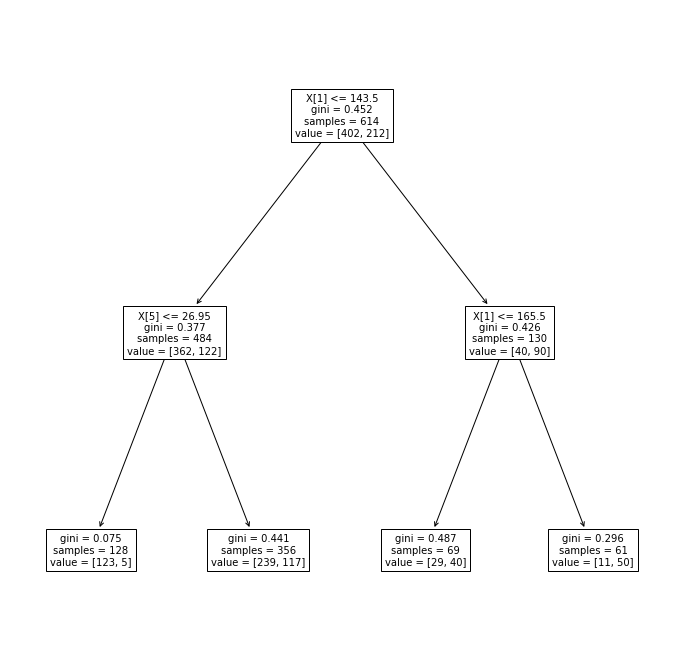

In [63]:
# tree.plot_tree(clf) 
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, max_depth=4, fontsize=10)
plt.show()

In [64]:
predicted = clf.predict(test_x)

In [65]:
counter = 0
for i in range(len(test_x)):
    if predicted[i] == test_y[i]:
        counter+=1
accuracy = counter/len(test_x)
accuracy

0.8051948051948052

### SVC

In [21]:
from sklearn import svm
svc = svm.SVC(C=1,kernel="linear")
svc.fit(train_x,train_y)
predicted = svc.predict(test_x)

In [22]:
counter = 0
for i in range(len(test_x)):
    if predicted[i] == test_y[i]:
        counter+=1
accuracy = counter/len(test_x)
accuracy

0.8571428571428571

### Neural Network

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)

model = Sequential()
model.add(Dense(1, input_dim=8, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, epochs=150, batch_size=1)

Epoch 1/150
614/614 [==============================] - 0s 463us/step - loss: 13.5741 - accuracy: 0.5863
Epoch 2/150
614/614 [==============================] - 0s 465us/step - loss: 5.9757 - accuracy: 0.4495
Epoch 3/150
614/614 [==============================] - 0s 560us/step - loss: 4.6188 - accuracy: 0.4316
Epoch 4/150
614/614 [==============================] - 0s 552us/step - loss: 3.7120 - accuracy: 0.4186
Epoch 5/150
614/614 [==============================] - 0s 467us/step - loss: 2.9097 - accuracy: 0.4381
Epoch 6/150
614/614 [==============================] - 0s 490us/step - loss: 2.2025 - accuracy: 0.4316
Epoch 7/150
614/614 [==============================] - 0s 552us/step - loss: 1.6459 - accuracy: 0.46910s - loss: 1.6836 - accuracy: 0.46
Epoch 8/150
614/614 [==============================] - 0s 681us/step - loss: 1.2310 - accuracy: 0.4919
Epoch 9/150
614/614 [==============================] - 0s 540us/step - loss: 0.9333 - accuracy: 0.5537
Epoch 10/150
614/614 [================

In [24]:
counter = 0
predicted = model.predict(test_x)

for i in range(len(test_x)):
    if predicted[i] >0.5:
        predicted[i]=1
    else:
        predicted[i]=0
    if predicted[i] == test_y[i]:
        counter+=1
accuracy = counter/len(test_x)
accuracy


0.8051948051948052

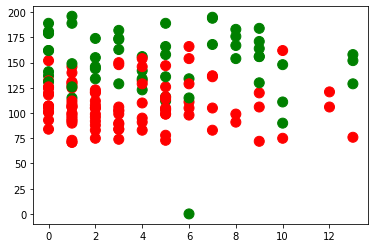

In [25]:
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
zero_one_colourmap = ListedColormap(('red', 'green'))
input_1 = []
input_2 = []
input_plot = []
for i in test_x:
    input_1.append(i[0])
    input_2.append(i[1])
    input_plot.append([i[0],i[1]])
plt.scatter(input_1,input_2, c=test_y, s=100, cmap = zero_one_colourmap)
plt.show()

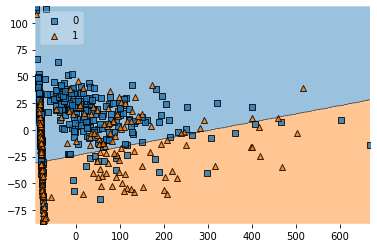

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(train_x)
X_test = pca.fit_transform(test_x)

svc.fit(X_train, train_y)



# input_1 = np.asarray(input_1)
# input_2 = np.asarray(input_2)
# input_plot = np.asarray(input_plot)
test_y = np.asarray(test_y) 
test_y = test_y.astype(int)
train_y = train_y.astype(int)
plot_decision_regions(X_train, train_y.ravel(), clf = svc, legend=2)
plt.show()

In [27]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, train_y, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 0s 624us/step - loss: 15.4018 - accuracy: 0.5993
Epoch 2/150
62/62 [==============================] - 0s 765us/step - loss: 13.4506 - accuracy: 0.6140
Epoch 3/150
62/62 [==============================] - 0s 774us/step - loss: 11.6513 - accuracy: 0.6352
Epoch 4/150
62/62 [==============================] - 0s 824us/step - loss: 10.0486 - accuracy: 0.6450
Epoch 5/150
62/62 [==============================] - 0s 665us/step - loss: 8.5791 - accuracy: 0.6515
Epoch 6/150
62/62 [==============================] - 0s 517us/step - loss: 7.3138 - accuracy: 0.6596
Epoch 7/150
62/62 [==============================] - 0s 490us/step - loss: 6.2276 - accuracy: 0.6808
Epoch 8/150
62/62 [==============================] - 0s 495us/step - loss: 5.4313 - accuracy: 0.6922
Epoch 9/150
62/62 [==============================] - 0s 501us/step - loss: 4.8867 - accuracy: 0.6938
Epoch 10/150
62/62 [==============================] - 0s 501us/step - loss: 4.4833 - ac

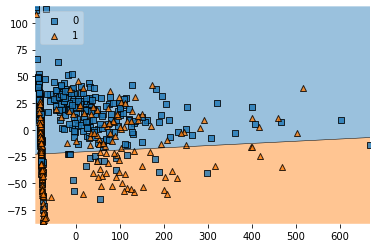

In [28]:
plot_decision_regions(X_train, train_y.ravel(), clf = model, legend=2)
plt.show()

In [29]:
model = Sequential()
model.add(Dense(3, input_dim=2, activation='sigmoid'))
model.add(Dense(1, input_dim=3, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, train_y, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 0s 748us/step - loss: 0.6731 - accuracy: 0.5423
Epoch 2/150
62/62 [==============================] - 0s 730us/step - loss: 0.6659 - accuracy: 0.5570
Epoch 3/150
62/62 [==============================] - 0s 712us/step - loss: 0.6595 - accuracy: 0.5733
Epoch 4/150
62/62 [==============================] - 0s 651us/step - loss: 0.6536 - accuracy: 0.6547
Epoch 5/150
62/62 [==============================] - 0s 694us/step - loss: 0.6477 - accuracy: 0.6547
Epoch 6/150
62/62 [==============================] - 0s 826us/step - loss: 0.6427 - accuracy: 0.6547
Epoch 7/150
62/62 [==============================] - 0s 749us/step - loss: 0.6384 - accuracy: 0.6547
Epoch 8/150
62/62 [==============================] - 0s 707us/step - loss: 0.6345 - accuracy: 0.6547
Epoch 9/150
62/62 [==============================] - 0s 704us/step - loss: 0.6305 - accuracy: 0.6547
Epoch 10/150
62/62 [==============================] - 0s 774us/step - loss: 0.6264 - accura

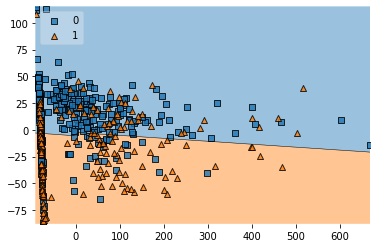

In [30]:
plot_decision_regions(X_train, train_y.ravel(), clf = model, legend=2)
plt.show()

In [31]:
model = Sequential()
# model.add(Dense(3, input_dim=2, activation='sigmoid'))
# model.add(Dense(3, input_dim=3, activation='sigmoid'))
model.add(Dense(1, input_dim=4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, train_y, epochs=150, batch_size=1)

Epoch 1/150
614/614 [==============================] - 0s 734us/step - loss: 0.6149 - accuracy: 0.6547
Epoch 2/150
614/614 [==============================] - 0s 718us/step - loss: 0.6016 - accuracy: 0.6547
Epoch 3/150
614/614 [==============================] - 0s 672us/step - loss: 0.5890 - accuracy: 0.6547
Epoch 4/150
614/614 [==============================] - 0s 609us/step - loss: 0.5822 - accuracy: 0.6466
Epoch 5/150
614/614 [==============================] - 0s 608us/step - loss: 0.5767 - accuracy: 0.6678
Epoch 6/150
614/614 [==============================] - 0s 531us/step - loss: 0.5717 - accuracy: 0.7231
Epoch 7/150
614/614 [==============================] - 0s 710us/step - loss: 0.5675 - accuracy: 0.7231
Epoch 8/150
614/614 [==============================] - 1s 1ms/step - loss: 0.5641 - accuracy: 0.7248
Epoch 9/150
614/614 [==============================] - 0s 714us/step - loss: 0.5607 - accuracy: 0.7231
Epoch 10/150
614/614 [==============================] - 0s 631us/step - los

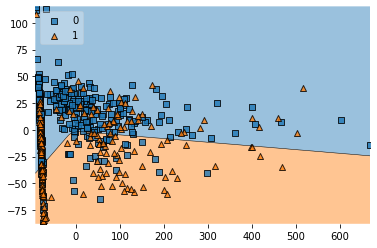

In [32]:
plot_decision_regions(X_train, train_y.ravel(), clf = model, legend=2)
plt.show()

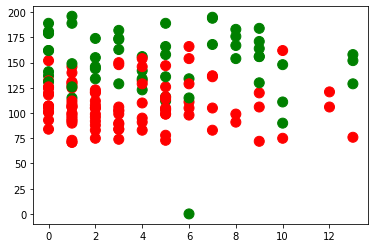

In [34]:
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
zero_one_colourmap = ListedColormap(('red', 'green'))
input_1 = []
input_2 = []
input_plot = []
for i in test_x:
    input_1.append(i[0])
    input_2.append(i[1])
    input_plot.append([i[0],i[1]])
plt.scatter(input_1,input_2, c=test_y, s=100, cmap = zero_one_colourmap)
plt.show()

In [36]:
inputs = []
for i in range(len(input_1)):
    inputs.append([input_1[i],input_2[i]])
inputs
inputs = np.asarray(inputs)
test_y = np.asarray(test_y)

In [37]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(inputs, test_y, epochs=200, batch_size=1)

Epoch 1/200
154/154 [==============================] - 0s 583us/step - loss: 50.9744 - accuracy: 0.3636
Epoch 2/200
154/154 [==============================] - 0s 611us/step - loss: 42.5273 - accuracy: 0.3636
Epoch 3/200
154/154 [==============================] - 0s 650us/step - loss: 33.9926 - accuracy: 0.3636
Epoch 4/200
154/154 [==============================] - 0s 623us/step - loss: 25.3868 - accuracy: 0.3636
Epoch 5/200
154/154 [==============================] - 0s 640us/step - loss: 16.8437 - accuracy: 0.3636
Epoch 6/200
154/154 [==============================] - 0s 570us/step - loss: 8.2715 - accuracy: 0.3571
Epoch 7/200
154/154 [==============================] - 0s 590us/step - loss: 1.4039 - accuracy: 0.4675
Epoch 8/200
154/154 [==============================] - 0s 636us/step - loss: 0.6519 - accuracy: 0.6494
Epoch 9/200
154/154 [==============================] - 0s 701us/step - loss: 0.6415 - accuracy: 0.6883
Epoch 10/200
154/154 [==============================] - 0s 754us/ste

154/154 [==============================] - 0s 538us/step - loss: 0.4985 - accuracy: 0.8052
Epoch 158/200
154/154 [==============================] - 0s 557us/step - loss: 0.4958 - accuracy: 0.8052
Epoch 159/200
154/154 [==============================] - 0s 483us/step - loss: 0.5004 - accuracy: 0.8052
Epoch 160/200
154/154 [==============================] - 0s 434us/step - loss: 0.4975 - accuracy: 0.7792
Epoch 161/200
154/154 [==============================] - 0s 448us/step - loss: 0.4948 - accuracy: 0.8117
Epoch 162/200
154/154 [==============================] - 0s 431us/step - loss: 0.5148 - accuracy: 0.7792
Epoch 163/200
154/154 [==============================] - 0s 511us/step - loss: 0.5025 - accuracy: 0.7987
Epoch 164/200
154/154 [==============================] - 0s 441us/step - loss: 0.5053 - accuracy: 0.7727
Epoch 165/200
154/154 [==============================] - 0s 492us/step - loss: 0.4997 - accuracy: 0.7922
Epoch 166/200
154/154 [==============================] - 0s 461us/ste

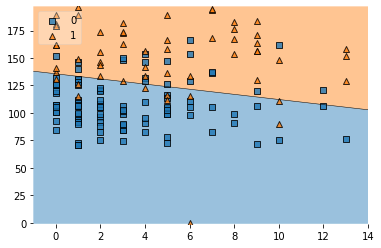

In [38]:
plot_decision_regions(inputs, test_y.ravel(), clf = model, legend=2)
plt.show()

In [39]:
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(1, input_dim=2, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(inputs, test_y, epochs=200, batch_size=1)

Epoch 1/200
154/154 [==============================] - 0s 541us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 2/200
154/154 [==============================] - 0s 508us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 3/200
154/154 [==============================] - 0s 526us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 4/200
154/154 [==============================] - 0s 504us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 5/200
154/154 [==============================] - 0s 532us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 6/200
154/154 [==============================] - 0s 510us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 7/200
154/154 [==============================] - 0s 513us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 8/200
154/154 [==============================] - 0s 558us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 9/200
154/154 [==============================] - 0s 520us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 10/200
154/154 [==============================] - 0s 538us/step - l

154/154 [==============================] - 0s 521us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 158/200
154/154 [==============================] - 0s 562us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 159/200
154/154 [==============================] - 0s 559us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 160/200
154/154 [==============================] - 0s 571us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 161/200
154/154 [==============================] - 0s 493us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 162/200
154/154 [==============================] - 0s 487us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 163/200
154/154 [==============================] - 0s 526us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 164/200
154/154 [==============================] - 0s 468us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 165/200
154/154 [==============================] - 0s 636us/step - loss: 5.6091 - accuracy: 0.6364
Epoch 166/200
154/154 [==============================] - 0s 698us/ste

/opt/anaconda3/envs/mygreatenvironment/lib/python3.6/site-packages/mlxtend/plotting/decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


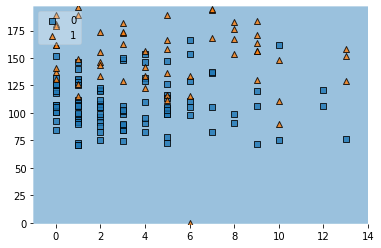

In [40]:
plot_decision_regions(inputs, test_y.ravel(), clf = model, legend=2)
plt.show()

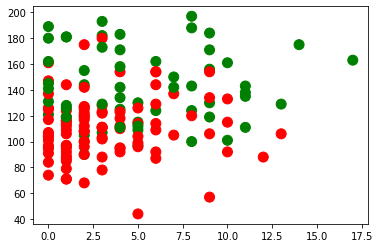

In [110]:
plt.scatter(input_1,input_2, c=test_y, s=100, cmap = zero_one_colourmap)
plt.show()

In [90]:
model = Sequential()
model.add(Dense(3, input_dim=2, activation='relu'))
model.add(Dense(3, input_dim=2, activation='relu'))

model.add(Dense(2, input_dim=3, activation='relu'))


model.add(Dense(2, input_dim=2, activation='relu'))

# model.add(Dense(3, input_dim=3, activation='tanh'))
model.add(Dense(1, input_dim=3, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=200, batch_size=1)

Epoch 1/200
50/50 [==============================] - 0s 654us/step - loss: 1.6407 - accuracy: 0.5000
Epoch 2/200
50/50 [==============================] - 0s 819us/step - loss: 1.2974 - accuracy: 0.5000
Epoch 3/200
50/50 [==============================] - 0s 808us/step - loss: 1.1606 - accuracy: 0.5000
Epoch 4/200
50/50 [==============================] - 0s 855us/step - loss: 1.0815 - accuracy: 0.5000
Epoch 5/200
50/50 [==============================] - 0s 897us/step - loss: 1.0169 - accuracy: 0.4400
Epoch 6/200
50/50 [==============================] - 0s 863us/step - loss: 0.9721 - accuracy: 0.4200
Epoch 7/200
50/50 [==============================] - 0s 841us/step - loss: 0.9392 - accuracy: 0.4000
Epoch 8/200
50/50 [==============================] - 0s 928us/step - loss: 0.9107 - accuracy: 0.3600
Epoch 9/200
50/50 [==============================] - 0s 1ms/step - loss: 0.8872 - accuracy: 0.3400
Epoch 10/200
50/50 [==============================] - 0s 908us/step - loss: 0.8669 - accuracy

50/50 [==============================] - 0s 785us/step - loss: 0.0355 - accuracy: 0.9800
Epoch 161/200
50/50 [==============================] - 0s 806us/step - loss: 0.0351 - accuracy: 0.9800
Epoch 162/200
50/50 [==============================] - 0s 889us/step - loss: 0.0307 - accuracy: 0.9800
Epoch 163/200
50/50 [==============================] - 0s 858us/step - loss: 0.0283 - accuracy: 0.9800
Epoch 164/200
50/50 [==============================] - 0s 850us/step - loss: 0.0266 - accuracy: 1.0000
Epoch 165/200
50/50 [==============================] - 0s 799us/step - loss: 0.0252 - accuracy: 0.9800
Epoch 166/200
50/50 [==============================] - 0s 825us/step - loss: 0.0240 - accuracy: 0.9800
Epoch 167/200
50/50 [==============================] - 0s 853us/step - loss: 0.0221 - accuracy: 0.9800
Epoch 168/200
50/50 [==============================] - 0s 780us/step - loss: 0.0211 - accuracy: 0.9800
Epoch 169/200
50/50 [==============================] - 0s 837us/step - loss: 0.0184 - a

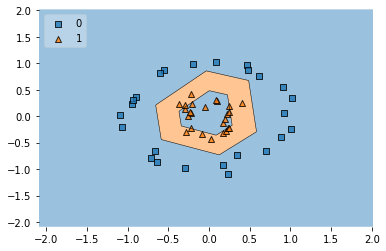

In [91]:
plot_decision_regions(X, y.ravel(), clf = model, legend=2)
plt.show()

In [82]:
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
# model.add(Dense(10, input_dim=10, activation='tanh'))
# model.add(Dense(10, input_dim=10, activation='tanh'))
# model.add(Dense(10, input_dim=10, activation='tanh'))

model.add(Dense(1, input_dim=64, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=200, batch_size=1)

Epoch 1/200
50/50 [==============================] - 0s 645us/step - loss: 2.3941 - accuracy: 0.5000
Epoch 2/200
50/50 [==============================] - 0s 606us/step - loss: 1.2352 - accuracy: 0.5000
Epoch 3/200
50/50 [==============================] - 0s 873us/step - loss: 1.1489 - accuracy: 0.5000
Epoch 4/200
50/50 [==============================] - 0s 834us/step - loss: 1.0826 - accuracy: 0.5000
Epoch 5/200
50/50 [==============================] - 0s 773us/step - loss: 1.0275 - accuracy: 0.5000
Epoch 6/200
50/50 [==============================] - 0s 852us/step - loss: 0.9743 - accuracy: 0.5000
Epoch 7/200
50/50 [==============================] - 0s 701us/step - loss: 0.9261 - accuracy: 0.5000
Epoch 8/200
50/50 [==============================] - 0s 631us/step - loss: 0.8781 - accuracy: 0.5000
Epoch 9/200
50/50 [==============================] - 0s 813us/step - loss: 0.8394 - accuracy: 0.4600
Epoch 10/200
50/50 [==============================] - 0s 802us/step - loss: 0.7954 - accura

50/50 [==============================] - 0s 845us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 160/200
50/50 [==============================] - 0s 782us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 161/200
50/50 [==============================] - 0s 823us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 162/200
50/50 [==============================] - 0s 801us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 163/200
50/50 [==============================] - 0s 772us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 164/200
50/50 [==============================] - 0s 846us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 165/200
50/50 [==============================] - 0s 791us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 166/200
50/50 [==============================] - 0s 666us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 167/200
50/50 [==============================] - 0s 793us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 168/200
50/50 [==============================

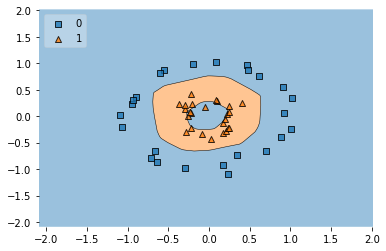

In [83]:
plot_decision_regions(X, y.ravel(), clf = model, legend=2)
plt.show()

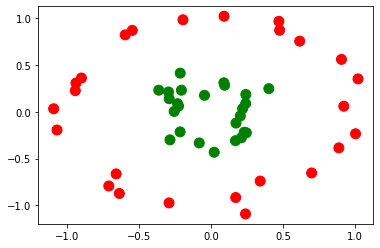

In [73]:
import tensorflow as tf

zero_one_colourmap = ListedColormap(('red', 'green'))

df_test = pd.read_excel("Data_test.xlsx")
X = df_test.loc[:, ["X1", "X2"]].values
y = df_test.loc[:, "Y"].values
plt.scatter(X[:,0],X[:,1], c=y, s=100, cmap = zero_one_colourmap)
plt.show()

In [74]:
def create_model(X, y, hidden_neurons, activation, total_epochs):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(hidden_neurons, 
                                  input_dim=2, 
                                  activation=activation))
  model.add(tf.keras.layers.Dense(1, activation=activation))
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['binary_accuracy'])
  history = model.fit(X, y, epochs=total_epochs)
  return model

In [75]:
relu_64_neuron_model = create_model(X, y, 64, 'relu', 200)

Epoch 1/200
2/2 [==============================] - 0s 980us/step - loss: 4.4516 - binary_accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 0s 904us/step - loss: 3.9372 - binary_accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 0s 959us/step - loss: 3.4356 - binary_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 0s 1ms/step - loss: 3.1378 - binary_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 0s 908us/step - loss: 2.8630 - binary_accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 0s 914us/step - loss: 2.6529 - binary_accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 0s 754us/step - loss: 2.5265 - binary_accuracy: 0.5000
Epoch 8/200
2/2 [==============================] - 0s 728us/step - loss: 2.4589 - binary_accuracy: 0.5000
Epoch 9/200
2/2 [==============================] - 0s 629us/step - loss: 2.0388 - binary_accuracy: 0.5000
Epoch 10/200
2/2 [==============================

2/2 [==============================] - 0s 826us/step - loss: 0.9306 - binary_accuracy: 0.5000
Epoch 79/200
2/2 [==============================] - 0s 737us/step - loss: 0.9270 - binary_accuracy: 0.5000
Epoch 80/200
2/2 [==============================] - 0s 740us/step - loss: 0.9227 - binary_accuracy: 0.5000
Epoch 81/200
2/2 [==============================] - 0s 754us/step - loss: 0.9191 - binary_accuracy: 0.5000
Epoch 82/200
2/2 [==============================] - 0s 613us/step - loss: 0.9153 - binary_accuracy: 0.5000
Epoch 83/200
2/2 [==============================] - 0s 669us/step - loss: 0.9118 - binary_accuracy: 0.5000
Epoch 84/200
2/2 [==============================] - 0s 775us/step - loss: 0.9080 - binary_accuracy: 0.5000
Epoch 85/200
2/2 [==============================] - 0s 1ms/step - loss: 0.9040 - binary_accuracy: 0.5000
Epoch 86/200
2/2 [==============================] - 0s 829us/step - loss: 0.9003 - binary_accuracy: 0.5000
Epoch 87/200
2/2 [==============================] - 

2/2 [==============================] - 0s 1ms/step - loss: 0.7017 - binary_accuracy: 0.5000
Epoch 156/200
2/2 [==============================] - 0s 928us/step - loss: 0.6998 - binary_accuracy: 0.5000
Epoch 157/200
2/2 [==============================] - 0s 1ms/step - loss: 0.6976 - binary_accuracy: 0.5000
Epoch 158/200
2/2 [==============================] - 0s 1ms/step - loss: 0.6955 - binary_accuracy: 0.5000
Epoch 159/200
2/2 [==============================] - 0s 882us/step - loss: 0.6935 - binary_accuracy: 0.5000
Epoch 160/200
2/2 [==============================] - 0s 1ms/step - loss: 0.6917 - binary_accuracy: 0.5000
Epoch 161/200
2/2 [==============================] - 0s 1ms/step - loss: 0.6896 - binary_accuracy: 0.5000
Epoch 162/200
2/2 [==============================] - 0s 812us/step - loss: 0.6875 - binary_accuracy: 0.5000
Epoch 163/200
2/2 [==============================] - 0s 832us/step - loss: 0.6856 - binary_accuracy: 0.5000
Epoch 164/200
2/2 [==============================] -

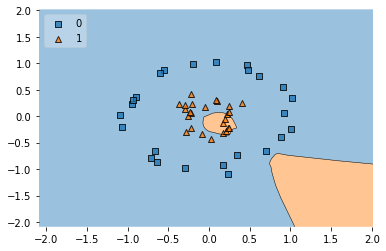

In [76]:
plot_decision_regions(X, y.ravel(), clf = relu_64_neuron_model, legend=2)
plt.show()

In [ ]:

def cost(x,y,w,bias):
    Cost = 0
    h = logistic(x,w,bias)
    Cost = -y*log(h)-(1-y)log(1-h)
    return Cost
def total_cost(input_list,w,bias):
    total = 0
    for i in input_list:
        total -= cost(i[:len(i)-1],i[len(i)-1])
    total/=len(input_list)
    return total
def logistic(x,w, bias):
    Logistic = 0
    w_T = w.transpose()
    Logistic = 1/(1 + math.exp(-calculate_output(x,w,bias)))
    
    
    return Logistic
def calculate_output(x,w,bias):
    output = 1
    for i in range(len(w)):
        output*=(np.dot(x,w[i].T)+bias[i])
    return output
    
def gradient_descent(Logistic, input_list):
    Gradient_descent = 0
    for i in input_list:
        Gradient_descent += ((logistic(i[:len(i)-1],w, bias)-i[len(i)-1])*i[:len(i)-1])
    Gradient_descent *= 1/len(input_list)
    return Gradient_descent
def update(input_list,w,bias,l)
    Update = 0
    
    
    return Update